# Интернет-магазин товаров для дома "Пока все ещё тут"

## Введение

Интернет-магазин товаров для дома «Пока все ещё тут»  в рамках программы развития требуется провести исследование пользовательского поведения для выявления профилей потребления. Данное исследование проводится с целью оптимизации и улучшения показателей продаж.

## Дополнительные материалы

Ссылка на презентацию:https://drive.google.com/file/d/1rtZuZlXjL-COdr23oRcqg_sHo0PACYmk/view?usp=sharing 

Ссылка на дашборд: https://public.tableau.com/app/profile/anton7450/viz/_16582409492030/Dashboard1#1  


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from datetime import datetime

## Ознакомление с предоставленным файлом с данными для проведения импорта данных, импорт данных, предобработка данных

Для проведения исследования специалистами магазина был передан датасет, который описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут». Файл был передан в разрешении .CSV. Для недопущения затруднений в дальнейшем использовании данного исследования импорт данных необходимо провести из URL источника. 

Выведем на экран базовые описания датасета для поулчения первичного представления о его структуре и значениях

In [2]:
data = pd.read_csv('ecommerce_dataset.csv')
print('Транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут»')
print()
display(data.head(5))
print()
print('Размер датасета')
print()
display(data.shape)
print()
print('Сводная информация о датасете')
print()
display(data.info())
print()
print('Сводная информация о значениях датасета')
print()
display(data.describe())
print()
print('Количество явных дубликатов:', data.duplicated().sum())

Транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут»



,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0



Размер датасета



(6737, 6)


Сводная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


None


Сводная информация о значениях датасета



,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000



Количество явных дубликатов: 0


В представленном датасете имеется 6737 записей, имеющих по 6 колонок:

- `date` — дата заказа; необходимо скорректировать формат значений на datetime, вы
- `customer_id` — идентификатор покупателя; 
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Пропущенные значения отсуствуют

Явные дубликаты отсутствуют

Необходимо добавить расчетные столбцы:
- номер месяц, в который заказ был произведен
- номер дня недели, в который заказ был произведен
- выручка с наименования товара в заказе (кол-во позиций данного товара в заказе * стоимость единицы товара)

In [3]:
# Преобразуем формат даты в столбце date
data['full_date'] = pd.to_datetime(data['date'], format= "%Y%m%d%H")

# Добавляем расчетные столбцы
data['date'] = pd.DatetimeIndex(data['full_date']).date
data['month'] = data['full_date'].dt.strftime('%Y-%m')
data['weekday'] = pd.DatetimeIndex(data['full_date']).weekday
data['hour'] = pd.DatetimeIndex(data['full_date']).hour
data['revenue'] = data['quantity']*data['price']



**Вывод по разделу:**
    
В представленном датасете имеется 6737 записей, имеющих по 6 колонок:

- `date` — дата заказа + час совершения заказа; необходимо скорректировать формат значений на datetime
- `customer_id` — идентификатор покупателя; 
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара

Данные были проверены на наличие дубликатов, пропусков, были определены необходимые дополнительные столбцы. Данные готовы к дальнейшему анализу. Выбросы и девиантные значения будут рассмотрены в процессе анализа


## Исследовательский анализ данных

- Рассмотреть средние и медианные значения по каждому параметру, рассмотреть среднеквадратичное отклонение
- Построить гистограммы для рассмотрения распределения по каждому показателю
- Сгруппировать данные по id пользователей
- Добавить рассчитываемые столбцы, включая, но не ограничиваясь:
    - Средняя стоимость заказов для каждого пользователя
- Выявить закономерности в полученных показателях, обозначить границы деления пользователей на сегменты по каждому значимому параметру, присвоить каждому пользователю индикаторы групп
- Подготовить графические материалы (круговые диаграммы) для отображения распределения пользователей по сегментам для каждого признака 

### Изучение средних и медианных значений

In [4]:
# Получение сводной информации по столбцам датасета 
data.describe()

,order_id,quantity,price,weekday,hour,revenue
count,6737.000000,6737.000000,6737.000000,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499,2.718421,13.863589,720.094998
std,27899.414662,15.266478,871.296064,2.001738,4.969169,8352.100591
min,12624.000000,1.000000,9.000000,0.000000,0.000000,9.000000
25%,14827.000000,1.000000,101.000000,1.000000,10.000000,120.000000
50%,68503.000000,1.000000,135.000000,3.000000,14.000000,162.000000
75%,70504.000000,1.000000,398.000000,4.000000,18.000000,600.000000
max,73164.000000,1000.000000,14917.000000,6.000000,23.000000,675000.000000


После рассмотрения средних и медианных значений подозрения касательно наличия девиантных значениях возникло для столбцов quantity с максимальным значением 1000 и стобца revenue со значением 675000. Возможно, это выбросы. Необходима дополнительная проверка, т.к. с равной долей вероятностей это могут быть оптовые заказы. Для понимания выведем топ-10 позиции по количеству товаров среди всех заказов и позиции, которые принесли максимальную выручку

In [5]:
print('ТОП-10 Позиций в заказах по кол-ву единиц товара')
display(data.sort_values(by = 'quantity', ascending = False).head(10))
print('ТОП-10 Позиций в заказах по выручке')
data.sort_values(by = 'revenue', ascending = False).head(10)

ТОП-10 Позиций в заказах по кол-ву единиц товара


,date,customer_id,order_id,product,quantity,price,full_date,month,weekday,hour,revenue
5456,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18 15:00:00,2019-06,1,15,675000.0
5071,2019-06-11,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,2019-06-11 07:00:00,2019-06,1,7,49432.0
3961,2019-05-20,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,2019-05-20 21:00:00,2019-05,0,21,15300.0
1158,2018-12-10,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,2018-12-10 14:00:00,2018-12,0,14,5800.0
568,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0,2018-11-01 08:00:00,2018-11,3,8,8670.0
211,2018-10-11,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,2018-10-11 14:00:00,2018-10,3,14,2850.0
212,2018-10-11,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0,2018-10-11 14:00:00,2018-10,3,14,5700.0
267,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0,2018-10-16 08:00:00,2018-10,1,8,5700.0
2431,2019-03-23,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0,2019-03-23 10:00:00,2019-03,5,10,3000.0
266,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,2018-10-16 08:00:00,2018-10,1,8,2850.0


ТОП-10 Позиций в заказах по выручке


,date,customer_id,order_id,product,quantity,price,full_date,month,weekday,hour,revenue
5456,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18 15:00:00,2019-06,1,15,675000.0
5071,2019-06-11,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,2019-06-11 07:00:00,2019-06,1,7,49432.0
1518,2019-01-15,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-0...,27,1755.0,2019-01-15 13:00:00,2019-01,1,13,47385.0
1299,2018-12-21,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъе...,57,574.0,2018-12-21 16:00:00,2018-12,4,16,32718.0
1023,2018-11-29,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,2018-11-29 17:00:00,2018-11,3,17,29248.0
661,2018-11-06,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",5,4874.0,2018-11-06 12:00:00,2018-11,1,12,24370.0
1675,2019-02-04,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-...,3,5512.0,2019-02-04 06:00:00,2019-02,0,6,16536.0
2971,2019-04-19,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х20...,10,1568.0,2019-04-19 19:00:00,2019-04,4,19,15680.0
3961,2019-05-20,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,2019-05-20 21:00:00,2019-05,0,21,15300.0
5992,2019-07-29,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,2019-07-29 17:00:00,2019-07,0,17,14917.0


Один заказ с номером 71743	является одновременно самым крупным по количеству и по принесенной выручке. Похоже на крупный оптовый заказ. Для дальнейшего анализа и недопущения искажения средних показателей необходимо очистить датасет от данной записи, т.к. она искусственно увеличит показатели выручки для июня 2019г. По показателю выручки данная позиция опережает своего ближайшего преследователя в 13.6 раз. Также, необходимо проверить:  сколько заказов совершил данный "подозрительный" пользователь

In [6]:
data.query('customer_id == "312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6"')

,date,customer_id,order_id,product,quantity,price,full_date,month,weekday,hour,revenue
5456,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18 15:00:00,2019-06,1,15,675000.0


In [7]:
# Заказ у "подозрительного пользователя всего 1"
# Удаление аномальной записи из датасета, но не из памяти
data = data.query('order_id != 71743 & revenue != 675000')


### Изучение влияния даты, месяца и дня недели на

Необходимо рассмотреть распределение количества заказов, клиентов совершивших заказ и размера выручки в зависимости от даты, месяца, дня недели для поиска закономерностей. 

In [8]:
print("Самая ранняя дата в датасете", data['date'].min())
print("Самая поздняя дата в датасете", data['date'].max())

Самая ранняя дата в датасете 2018-10-01
Самая поздняя дата в датасете 2019-10-31


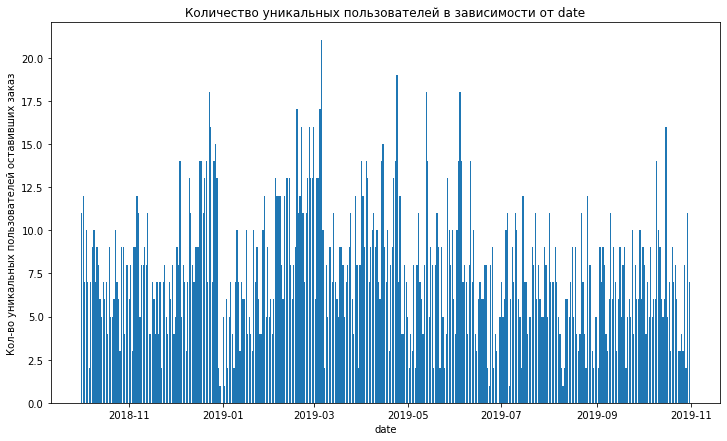

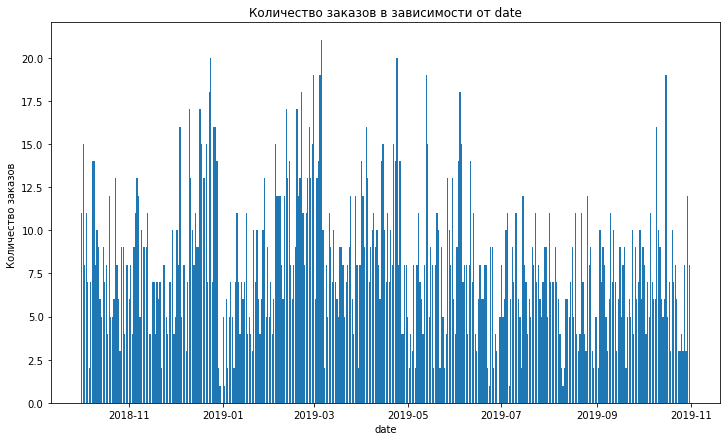

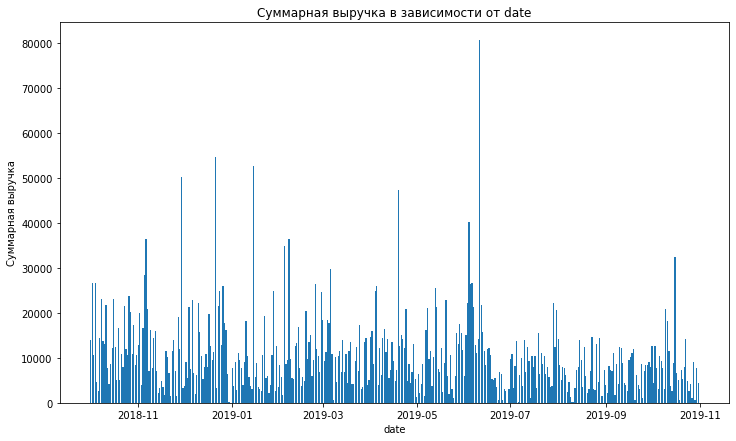

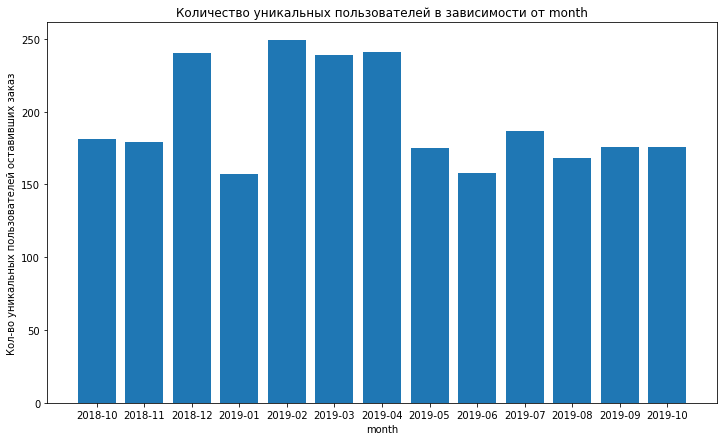

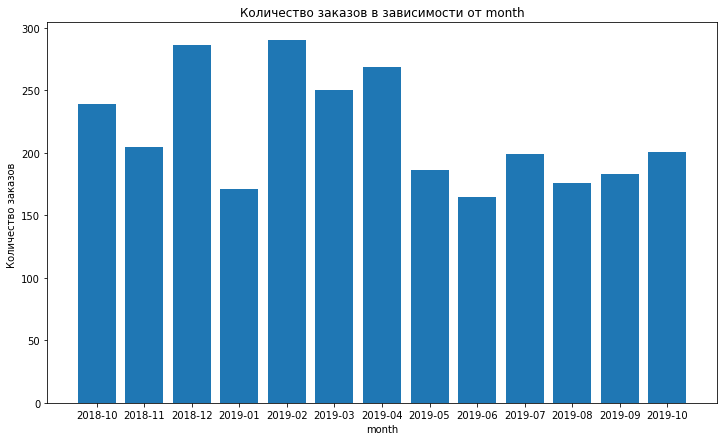

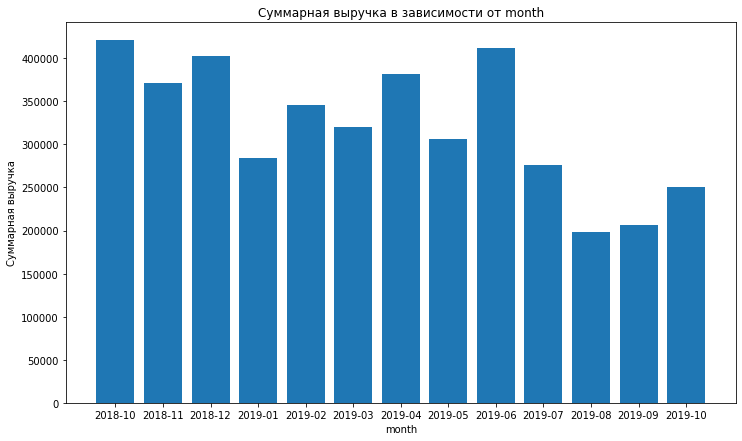

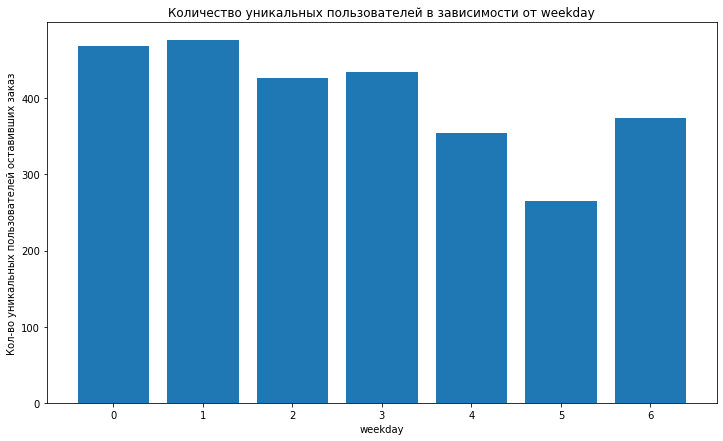

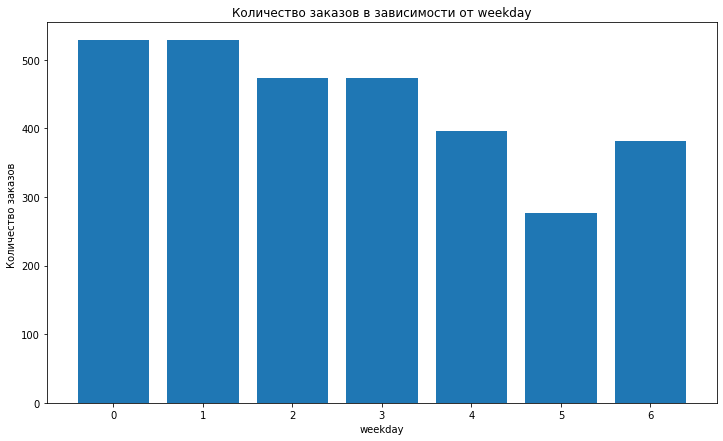

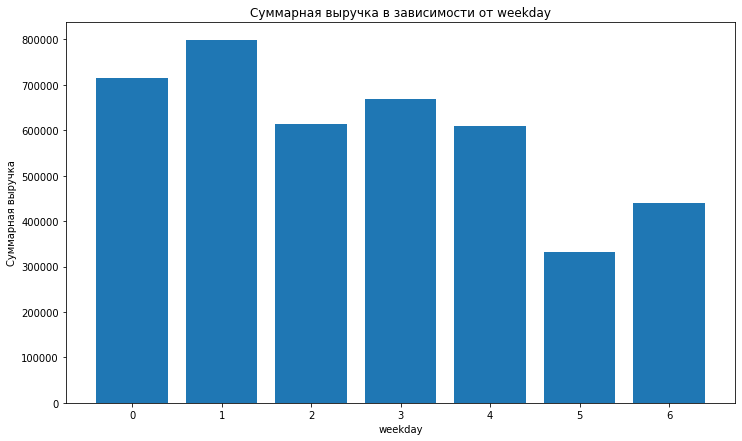

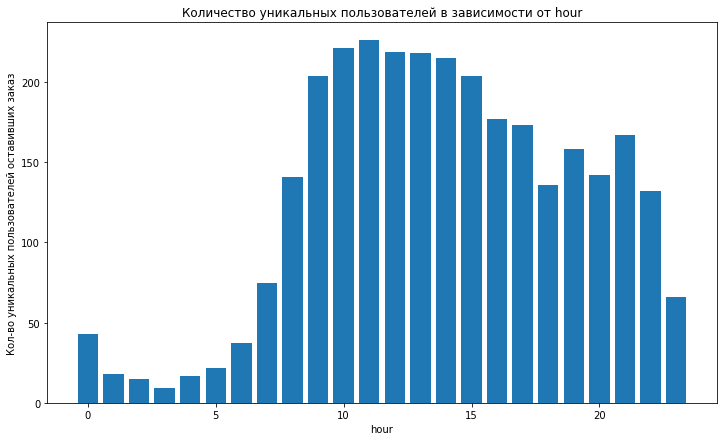

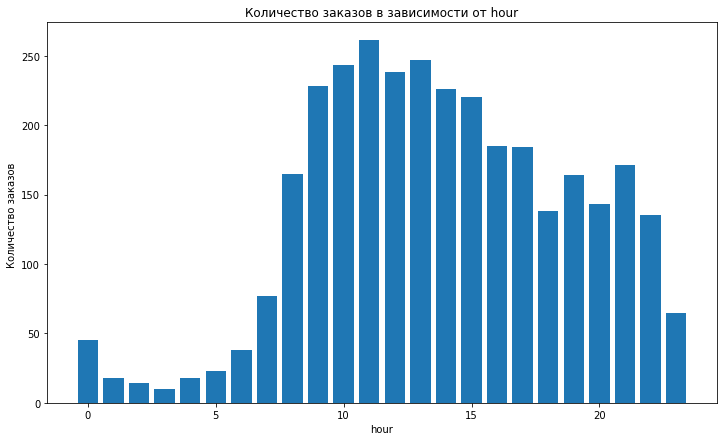

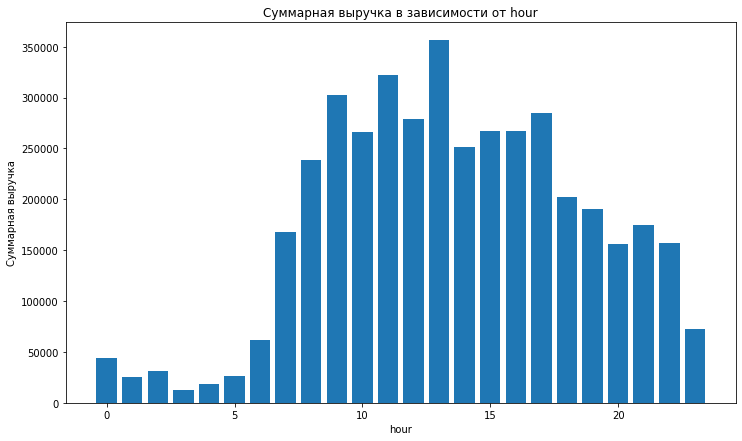

In [9]:
index_group = ['date', 'month', 'weekday', 'hour']

for index in index_group:

    data_grouped = data.pivot_table(index = [index], values = ['customer_id','order_id'], aggfunc = 'nunique').reset_index(drop=False)
    plt.figure(figsize=(12, 7))
    plt.title("Количество уникальных пользователей в зависимости от {}".format(index))
    plt.xlabel('{}'.format(index))
    plt.ylabel('Кол-во уникальных пользователей оставивших заказ')
    plt.bar(data_grouped[index], data_grouped['customer_id'])
    
    plt.figure(figsize=(12, 7))
    plt.title("Количество заказов в зависимости от {}".format(index))
    plt.xlabel('{}'.format(index))
    plt.ylabel('Количество заказов ')
    plt.bar(data_grouped[index], data_grouped['order_id'])

    data_grouped = data.pivot_table(index = [index], values = ['revenue'], aggfunc = 'sum').reset_index(drop=False)
    plt.figure(figsize=(12, 7))
    plt.title("Суммарная выручка в зависимости от {}".format(index))
    plt.xlabel('{}'.format(index))
    plt.ylabel('Суммарная выручка')
    plt.bar(data_grouped[index], data_grouped['revenue'])

По построенным графическим материалам видны следующие зависимости и закономерности:

- Зависимость от даты. Показатели количества новых пользователей, размещенных заказов и выручки имеют резкую волнообразную структуру с резкими взлетами и падениями. Возможно, это влияние зависимости показателей от дней недели. Например, в выходные люди могут совершать меньше заказов. Также, может наблюдаться сезонная зависимость показателей от времени года. Для аналитики сезонной зависимости и месячной зависимости необходимо иметь данные за период бне менее 2-3. В противном случае возможны отклонения прогнозов от факта.


- Зависимость от месяца. Наибольшее количество новых пользователей оформило декабре (новогодние подарки) и период февраль-апрель (подготовка к дачному сезону). Количество размещенных заказов имеет аналогичные показатели. Наибольшую же выручку вновь показал октябрь 2018. Хорошими в плане выручки также были декабрь и период февраля по июнь. В июле и августе наблюдается резкое снижение выручки.


- Зависимость от дня недели. Количество уникальных пользователей, разместивших заказ больше всего в первой половине недели и в воскресенье. Суббота обладает наименьшим показателем. Наибольшее количество заказов размещается с понедельника по четверг. В субботу наблюдается падение спроса. Наибольшая выручка добывается в понедельник-вторник. Наименьший показатель, опять же, в субботу.  Есть подозрение, что пользователи спешат сделать заказ в начале недели, чтобы непременно получить его до выходных и в субботу уже использовать полученный товар. Возможно, причина такого распределения кроется в длительном сроке доставки (заказ, сделанный в четверг не успеет доехать до субботы) и ограниченной зоне доставки, т.к. пользователи не могут заказать товар сразу к себе на дачу, а в понедельник-вторник он им не нужен, т.к. та же рассада потребует ухода до момента использования в выходной день.


- Зависимость от времени суток. Ожидаемо, самое активное и прибыльное время - дневное с 10 до 14 часов. К ночи активновсть спадает

### Сегментация пользователей по количеству заказов

В рамках разработки данного раздела исследования необходимо узнать распределение пользователей по количеству совершенных заказов, установить границы между сегментами и присвоить каждому пользователю соотвествующий индикатор

Рассмотрение распределения количества пользователей в разбивке по order_id .
Внимание: график логарифмический


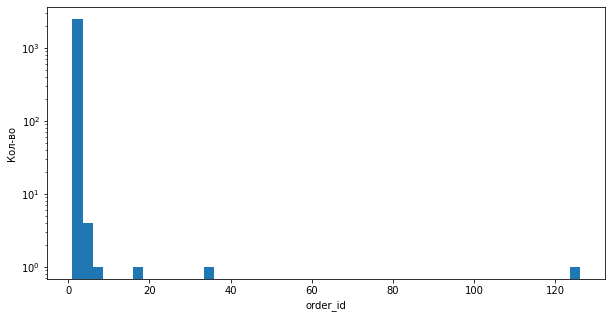


ТОП-10 пользователей по order_id


,order_id,quantity,revenue
customer_id,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,126,344,166988.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,409,60828.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,18,21713.0
b7b865ab-0735-407f-8d0c-31f74d2806cc,7,68,3779.0
0184f535-b60a-4914-a982-231e3f615206,5,75,7707.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,85,41900.0
e0535076-6270-4df2-8621-cb06264a94fa,4,4,636.0
bea7a833-2074-42db-bc49-4457abd3c930,4,30,4409.0
6b0c6cfb-7717-4c34-8535-bbc6e2b2c758,3,30,660.0



50, 75,  90, 95, 97, 99 Персентили по параметру order_id
Персентиль 50 для параметра order_id равен =  1.0
Персентиль 75 для параметра order_id равен =  1.0
Персентиль 90 для параметра order_id равен =  1.0
Персентиль 95 для параметра order_id равен =  2.0
Персентиль 97 для параметра order_id равен =  2.0
Персентиль 99 для параметра order_id равен =  3.0

Рассмотрение распределения количества пользователей в разбивке по revenue .
Внимание: график логарифмический


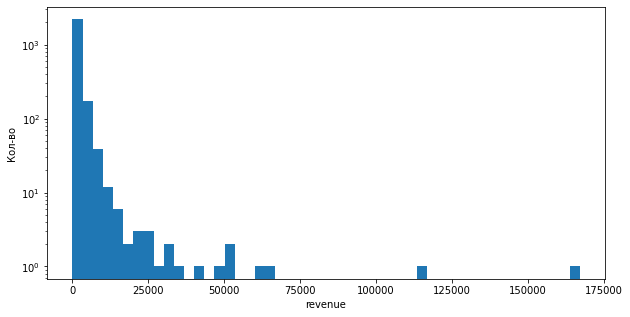


ТОП-10 пользователей по revenue


,order_id,quantity,revenue
customer_id,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,126,344,166988.0
1d6c8c1f-a799-4418-9af2-1ded47d7a85c,1,900,114750.0
57cc80a2-2610-4eef-9457-e7c3bf0c72f0,1,60,65220.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,409,60828.0
58a4c3cc-504f-43ea-a74a-bae19e665552,2,30,53232.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,1,96,50770.0
146cd9bf-a95c-4afb-915b-5f6684b17444,1,334,49432.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,85,41900.0
8fba3604-ef57-4b9f-b2fe-3402fa8825c8,1,101,33680.0



50, 75,  90, 95, 97, 99 Персентили по параметру revenue
Персентиль 50 для параметра revenue равен =  741.0
Персентиль 75 для параметра revenue равен =  1649.0
Персентиль 90 для параметра revenue равен =  3375.899999999999
Персентиль 95 для параметра revenue равен =  5087.299999999998
Персентиль 97 для параметра revenue равен =  6898.53
Персентиль 99 для параметра revenue равен =  14661.709999999877

Рассмотрение распределения количества пользователей в разбивке по quantity .
Внимание: график логарифмический


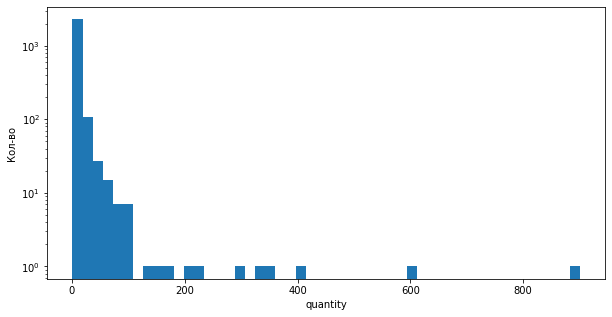


ТОП-10 пользователей по quantity


,order_id,quantity,revenue
customer_id,,,
1d6c8c1f-a799-4418-9af2-1ded47d7a85c,1,900,114750.0
cd09ea73-d9ce-48c3-b4c5-018113735e80,1,600,17100.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,409,60828.0
c971fb21-d54c-4134-938f-16b62ee86d3b,126,344,166988.0
146cd9bf-a95c-4afb-915b-5f6684b17444,1,334,49432.0
5d189e88-d4d6-4eac-ab43-fa65a3c4d106,1,300,15300.0
db77c238-3c80-4032-9e3c-c30a43f4a650,1,224,23660.0
a984c5b7-ff7e-4647-b84e-ef0b85a2762d,1,200,5800.0
aa42dc38-780f-4b50-9a65-83b6fa64e766,1,170,8670.0



50, 75,  90, 95, 97, 99 Персентили по параметру quantity
Персентиль 50 для параметра quantity равен =  1.0
Персентиль 75 для параметра quantity равен =  4.0
Персентиль 90 для параметра quantity равен =  12.0
Персентиль 95 для параметра quantity равен =  25.0
Персентиль 97 для параметра quantity равен =  34.0
Персентиль 99 для параметра quantity равен =  72.54999999999882



In [10]:
"""
Группируем данные по полю с id пользователя, считаем уникальные заказы, сумму выручки, которую создал данный пользователь, 
строим гистограмму, выводим топ-10 активных пользователей,
считаем 50, 75, 95, 97, 99 персентили
"""

pivot_data =  (
    data.pivot_table(index = 'customer_id', values = ['order_id', 'revenue', 'quantity'], 
                     aggfunc = {'order_id':'nunique','revenue':'sum', 'quantity': 'sum'})
    )

# Задания цикла и списка индексов для автоматизации изучения параметров

index_list = ['order_id','revenue','quantity']

for index in index_list:
# Построение гистограммы
    print('Рассмотрение распределения количества пользователей в разбивке по', index, '.\nВнимание: график логарифмический')
    plt.figure(figsize=(10,5))
    plt.hist(pivot_data[index],log = True, bins = 50)
    plt.ylabel('Кол-во')
    plt.xlabel(index)
    plt.show()
    print()
    
# Демонстрация ТОП-10 покупателей по признаку
    print('ТОП-10 пользователей по', index)
    display(
        pivot_data
        .sort_values(by = index, ascending = False)
        .head(10)
    )
    print()
    
# Расчет персентилей с помощью цикла
    print('50, 75,  90, 95, 97, 99 Персентили по параметру', index)
    percentiles = [50, 75,  90,  95, 97, 99]
    
    for value in percentiles:

        percentile = np.percentile(
            pivot_data[index], value)
        print('Персентиль', value, 'для параметра', index, 'равен = ',percentile, )
    print()

**Количество заказов** 

Как видно из построенной гистограммы - подавляющее большинство пользователей сделали лишь один заказ. ТОП-10 активных пользователей замыкают пользователи, совершившие лишь 3 заказа. 99-ый персентиль равен 3, что свидетельствет о том, что 99% пользователей совершили 3 и менее заказов. При этом еще 5 пользователей совершили от 4 до 7 заказов. 3 пользователя совершили 17 и более заказов

**Выручка**

90% покупателей принесли выручку меньшую или равную 3375 у.е. лишь 7 пользователей совершили суммарные покупки на 50 000 у.е. или более


**Количество купленных единиц товаров** 

90 или более процентов покупателей купили суммарно 11 или меньше единиц товара. 95% покупателей остановились на отметке в 25 единиц товара.

По результатам анализа логичным будет следующее распределение пользователей на сегменты:

**По количеству заказов**
- единоразовый клиент - 1 совершенный заказ
- постоянный клиент - 2-7 совершенных заказов
- оптовый покупатель - 8 и более совершенных заказов 

**По сумме заказов**
- клиент с маленькой суммой заказов - 0-999 у.е. 
- клиент со средней суммой заказов - 1000-3375 у.е. 
- клиент высокой суммой заказов- 3376 и выше у.е. 

**По количеству купленных единиц товаров**
- клиент с обычным количеством позиций - 0-3 позиций
- клиент с повышенным количеством позиций - 4-24 позиций
- клиент с большим количеством позиций - 25+ позиций

Для проведения данной сегментации предварительно необходимо выявить оптовых покупателей - тех, кто совершал покупки одних и тех же единиц товаров в больших количествах. Примем нижнюю границу уровня равную 10 единицам одного и того же товара, что является общепринятой границей мелкого опта.

Рассмотрение распределения количества пользователей в разбивке по order_id .
Внимание: график логарифмический


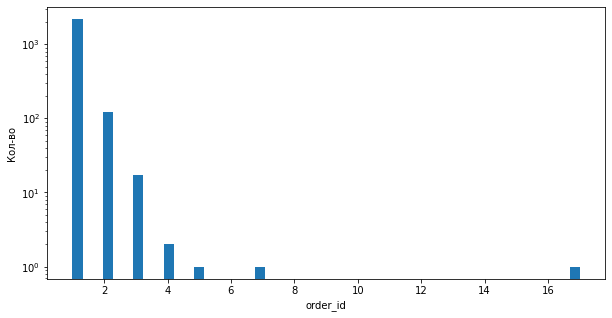


ТОП-10 пользователей по order_id


,order_id,quantity,revenue
customer_id,,,
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,18,21713.0
b7b865ab-0735-407f-8d0c-31f74d2806cc,7,68,3779.0
0184f535-b60a-4914-a982-231e3f615206,5,75,7707.0
bea7a833-2074-42db-bc49-4457abd3c930,4,30,4409.0
e0535076-6270-4df2-8621-cb06264a94fa,4,4,636.0
62952c5b-e5ef-4009-a2f9-1ebff401c514,3,11,1629.0
d16fbc13-50a6-4dea-aafc-bc197aafc9e4,3,9,1298.0
552e17df-ba16-4e66-84fb-55a5557a6bea,3,31,5398.0
7d64b4ea-d03f-4c3a-b283-21b3d0d237f1,3,7,938.0



50, 75,  90, 95, 97, 99 Персентили по параметру order_id
Персентиль 50 для параметра order_id равен =  1.0
Персентиль 75 для параметра order_id равен =  1.0
Персентиль 90 для параметра order_id равен =  1.0
Персентиль 95 для параметра order_id равен =  2.0
Персентиль 97 для параметра order_id равен =  2.0
Персентиль 99 для параметра order_id равен =  2.0

Рассмотрение распределения количества пользователей в разбивке по revenue .
Внимание: график логарифмический


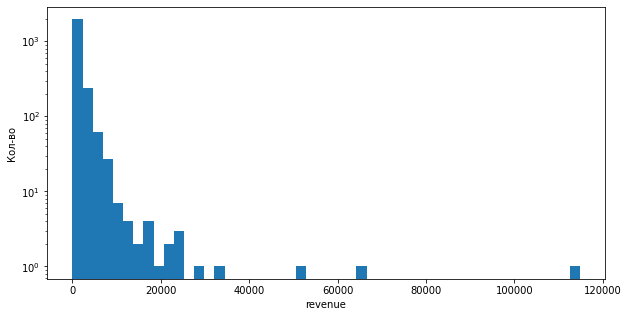


ТОП-10 пользователей по revenue


,order_id,quantity,revenue
customer_id,,,
1d6c8c1f-a799-4418-9af2-1ded47d7a85c,1,900,114750.0
57cc80a2-2610-4eef-9457-e7c3bf0c72f0,1,60,65220.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,1,96,50770.0
ae6940d3-a1c7-4997-8853-a5b8afc60d51,1,18,32382.0
e382d4c4-a4c9-44d3-97a0-a8868e122563,1,7,28973.0
1b2764ad-9151-4051-a46a-9b01b62e6335,1,5,24370.0
ff31d802-dae6-484d-a3dc-c9723f1cb538,2,8,23992.0
db77c238-3c80-4032-9e3c-c30a43f4a650,1,224,23660.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,18,21713.0



50, 75,  90, 95, 97, 99 Персентили по параметру revenue
Персентиль 50 для параметра revenue равен =  727.0
Персентиль 75 для параметра revenue равен =  1574.0
Персентиль 90 для параметра revenue равен =  3144.2999999999997
Персентиль 95 для параметра revenue равен =  4648.0
Персентиль 97 для параметра revenue равен =  6084.459999999996
Персентиль 99 для параметра revenue равен =  10710.269999999997

Рассмотрение распределения количества пользователей в разбивке по quantity .
Внимание: график логарифмический


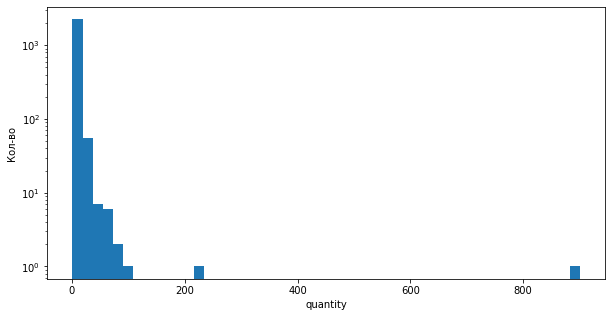


ТОП-10 пользователей по quantity


,order_id,quantity,revenue
customer_id,,,
1d6c8c1f-a799-4418-9af2-1ded47d7a85c,1,900,114750.0
db77c238-3c80-4032-9e3c-c30a43f4a650,1,224,23660.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,1,96,50770.0
3d5fef90-4a65-4a7e-84cf-010eba7b038d,1,90,3630.0
0184f535-b60a-4914-a982-231e3f615206,5,75,7707.0
b7b865ab-0735-407f-8d0c-31f74d2806cc,7,68,3779.0
97f94402-66c0-4995-b8d7-adb33eda71c8,2,64,3154.0
42d3cb27-6519-4627-9b4a-5aa8ee600203,1,63,3476.0
1046d601-0ec2-4038-a1d9-ede848cf5509,1,60,4920.0



50, 75,  90, 95, 97, 99 Персентили по параметру quantity
Персентиль 50 для параметра quantity равен =  1.0
Персентиль 75 для параметра quantity равен =  3.0
Персентиль 90 для параметра quantity равен =  8.0
Персентиль 95 для параметра quantity равен =  12.0
Персентиль 97 для параметра quantity равен =  19.0
Персентиль 99 для параметра quantity равен =  34.0



In [11]:
# Отбираем записи с количеством одинакового товара больше 10 для получения списка id таких пользователей
opt_list = data.query('quantity > 10')
# Формируем список Id оптовиков
opt_id_list = list(opt_list['customer_id'])

# Разделяем все записи датасета на обычных и оптовых покупателей
data_regular = data.query('customer_id not in @opt_id_list')
data_opt = data.query('customer_id in @opt_id_list')

# Проведем заново изучение признаков для возможной коррктировки границ классов

pivot_data_regular =  (
    data_regular.pivot_table(index = 'customer_id', values = ['order_id', 'revenue', 'quantity'], 
                     aggfunc = {'order_id':'nunique','revenue':'sum', 'quantity': 'sum'})
    )

for index in index_list:
# Построение гистограммы
    print('Рассмотрение распределения количества пользователей в разбивке по', index, '.\nВнимание: график логарифмический')
    plt.figure(figsize=(10,5))
    plt.hist(pivot_data_regular[index],log = True, bins = 50)
    plt.ylabel('Кол-во')
    plt.xlabel(index)
    plt.show()
    print()
    
# Демонстрация ТОП-10 покупателей по признаку
    print('ТОП-10 пользователей по', index)
    display(
        pivot_data_regular
        .sort_values(by = index, ascending = False)
        .head(10)
    )
    print()
    
# Расчет персентилей с помощью цикла
    print('50, 75,  90, 95, 97, 99 Персентили по параметру', index)
    percentiles = [50, 75,  90,  95, 97, 99]
    
    for value in percentiles:

        percentile = np.percentile(
            pivot_data_regular[index], value)
        print('Персентиль', value, 'для параметра', index, 'равен = ',percentile, )
    print()

Выделенные ранее границы сохраняются, т.к. были сделаны на основе персентилей, а не средних значений.

Не смотря на выделение оптовиков в отдельный датасет, присутствуют записи о заказах с 900 и 224 позициями в нем. Проведем проверку

In [12]:
# Выведем все записи с подозрительными id пользователей
data.query('customer_id == "1d6c8c1f-a799-4418-9af2-1ded47d7a85c" or customer_id == "db77c238-3c80-4032-9e3c-c30a43f4a650"')

,date,customer_id,order_id,product,quantity,price,full_date,month,weekday,hour,revenue
4157,2019-05-31,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,2019-05-31 12:00:00,2019-05,4,12,120.0
4158,2019-05-31,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,2019-05-31 12:00:00,2019-05,4,12,120.0
4159,2019-05-31,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0,2019-05-31 12:00:00,2019-05,4,12,120.0
4160,2019-05-31,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0,2019-05-31 12:00:00,2019-05,4,12,120.0
4161,2019-05-31,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0,2019-05-31 12:00:00,2019-05,4,12,120.0
...,...,...,...,...,...,...,...,...,...,...,...
5540,2019-06-22,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0,2019-06-22 06:00:00,2019-06,5,6,120.0
5541,2019-06-22,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,2019-06-22 06:00:00,2019-06,5,6,120.0
5542,2019-06-22,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0,2019-06-22 06:00:00,2019-06,5,6,120.0
5543,2019-06-22,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0,2019-06-22 06:00:00,2019-06,5,6,120.0


Обнаружилось, что данные заказы на 900 и 224 позиций не принадлежит к оптовым закупкам, скорее они принадлежат настоящему садовому эксперементатору. Интересно то, что номер заказ одинаков для всех записей при том, что дата меняется. 

**Необходимо спросить у лица, которое передало данные, нормально ли это, т.к. возможно это технический сбой при сборе данных, который объединяет разные заказы пользователя в один. Это может быть вероятной причиной подавляющего количества пользователей, которые якобы совершили лишь 1 заказ.**

На данном моменте следовало бы приостановить анализ до момента прояснения, т.к. данное явление может сказаться на точности измерения показателей количества заказов, их распределения по времени, средней стоимости заказа, среднему количеству товаров в заказе. 


Присвоим пользователям 3 категории в зависимости от покупательского поведения (количество, сумма заказа, количество товаров в заказе)

In [13]:
"""
Готовим сводную таблиц по номеру заказа с указанием минимального и максимального параметра даты для этого заказа. 
Обычно, они равны друг другу
"""

time_pivot = data.pivot_table(index = 'order_id', values = ["date"], aggfunc = [min,max]).reset_index()

time_pivot['delta'] =  time_pivot['max'] - time_pivot["min"]

print("ТОП-10 заказов с самой большой разницей времени внутри заказа")
display(time_pivot.sort_values(by ='delta', ascending = False).head(10))
print()
print("Количество заказов времени внутри заказа")
display(len(list(time_pivot.sort_values(by ='delta', ascending = False)['order_id'])))

print("Список заказов времени внутри заказа")
display(list(time_pivot.sort_values(by ='delta', ascending = False)['order_id']))


pivot_data = pivot_data.reset_index()

"""
Напишем функции для распределения пользователей по группам в зависимости
от значения оцениваемого критерия. Для оптовиков предусмотрен отдельный класс по всем признакам. 
Это позволит в дальнейшим отслеживать их отдельно
"""

# Функция для классификации по количеству заказов
def orders_grouper(pivot_data):
    if pivot_data['customer_id'] in opt_id_list:
        return 'wholesale buyer'
    elif pivot_data['order_id']  < 2:
        return '1 order group'
    elif (pivot_data['order_id'] >= 2) and (pivot_data['order_id'] <= 7):
        return '2-7 orders group'
    elif pivot_data['order_id'] > 7 :
        return '8+ orders group'
    
# Функция для классификации по сумме покупок:
def revenue_grouper(pivot_data):
    if pivot_data['customer_id'] in opt_id_list:
        return 'wholesale buyer'
    elif pivot_data['revenue'] < 1000 :
        return 'low revenue'
    elif (pivot_data['revenue'] >= 1000) and (pivot_data['revenue'] < 3375):
        return 'average revenue'
    elif pivot_data['revenue'] >= 3375 :
        return 'high revenue'
    
# Функция для классификации по количеству купленных единиц товаров:
def quantity_grouper(pivot_data):
    if pivot_data['customer_id'] in opt_id_list:
        return 'wholesale buyer'
    elif pivot_data['quantity'] < 3 :
        return 'low quantity group'
    elif (pivot_data['quantity'] >= 3) and (pivot_data['quantity'] < 25):
        return 'average quantity group'
    elif pivot_data['quantity'] >= 25 :
        return 'high quantity group'

pivot_data['orders_quantity_group']  = pivot_data.apply(lambda x: orders_grouper(x), axis = 1)
pivot_data['revenue_group']  = pivot_data.apply(lambda x: revenue_grouper(x), axis = 1)
pivot_data['goods_quantity_group']  = pivot_data.apply(lambda x: quantity_grouper(x), axis = 1)

pivot_data.rename(columns = {'order_id' : 'total_orders', 'quantity' : 'total_quantity', 'revenue':'total_revenue'}, inplace = True)

ТОП-10 заказов с самой большой разницей времени внутри заказа


,order_id,min,max,delta
,,date,date,
1658,70960,2019-04-01,2019-10-28,"210 days, 0:00:00"
2004,71663,2019-06-10,2019-09-05,"87 days, 0:00:00"
1049,69797,2019-01-12,2019-04-05,"83 days, 0:00:00"
933,69531,2018-12-23,2019-03-06,"73 days, 0:00:00"
1939,71542,2019-05-28,2019-08-07,"71 days, 0:00:00"
1712,71054,2019-04-07,2019-06-05,"59 days, 0:00:00"
817,69310,2018-12-11,2019-02-03,"54 days, 0:00:00"
533,68814,2018-10-31,2018-12-23,"53 days, 0:00:00"
1754,71148,2019-04-15,2019-06-05,"51 days, 0:00:00"



Количество заказов времени внутри заказа


2783

Список заказов времени внутри заказа


[70960,
 71663,
 69797,
 69531,
 71542,
 71054,
 69310,
 68814,
 71148,
 69586,
 13547,
 70946,
 69750,
 70903,
 69807,
 69162,
 69381,
 72403,
 70962,
 14833,
 14521,
 69421,
 56879,
 68476,
 69640,
 69765,
 70769,
 68891,
 72778,
 69527,
 69868,
 71860,
 72066,
 70542,
 14644,
 69833,
 71463,
 70463,
 14835,
 69694,
 14541,
 73002,
 71363,
 69282,
 69485,
 71648,
 70115,
 69109,
 72615,
 72926,
 70718,
 70031,
 68611,
 70995,
 72518,
 70419,
 70862,
 71400,
 71413,
 70144,
 71188,
 72845,
 70726,
 70114,
 72861,
 71480,
 70270,
 14872,
 14500,
 68760,
 72434,
 72402,
 70059,
 69881,
 70567,
 70677,
 70318,
 71143,
 71249,
 72790,
 68785,
 70480,
 69726,
 72786,
 14664,
 70554,
 70356,
 69345,
 70186,
 72075,
 72892,
 70856,
 68474,
 72055,
 14570,
 70620,
 68647,
 71257,
 71398,
 73027,
 70734,
 69396,
 71130,
 71074,
 72177,
 14753,
 68996,
 71573,
 72520,
 71089,
 71341,
 70828,
 14537,
 70217,
 72566,
 71560,
 70800,
 70476,
 72827,
 72824,
 71758,
 68919,
 72593,
 68860,
 14896,


In [14]:
data = data.merge(pivot_data, on = "customer_id")

Каждой записи датасета на основе id пользователя были присвоены 3 классификатора, добавлены расчетные величины с указанием общего количества, выручки и суммы покупок для данного клиента. Предполагаемым оптовым покупателям было добавлено отдельное значение в каждом классификаторе. Ниже будут продемонстрированы круговые диаграммы для отображения соотношения групп между собой.

Визуализируем ранее продемонстрированные графики зависимости количества заказов, новых пользователй и выручки в зависимости от даты, месяца, дня недели, часа совершения заказа

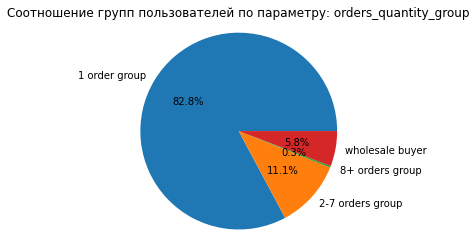

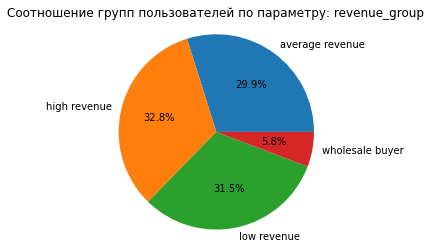

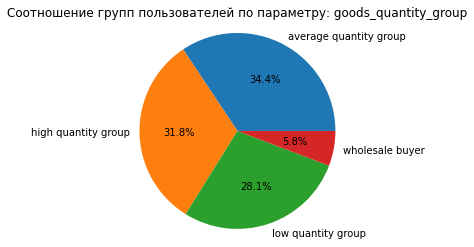

/tmp/ipykernel_138/1215332031.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14, 7))


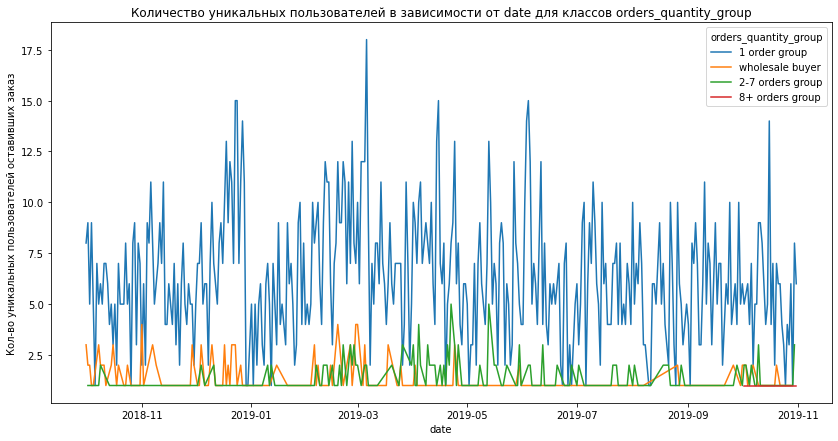

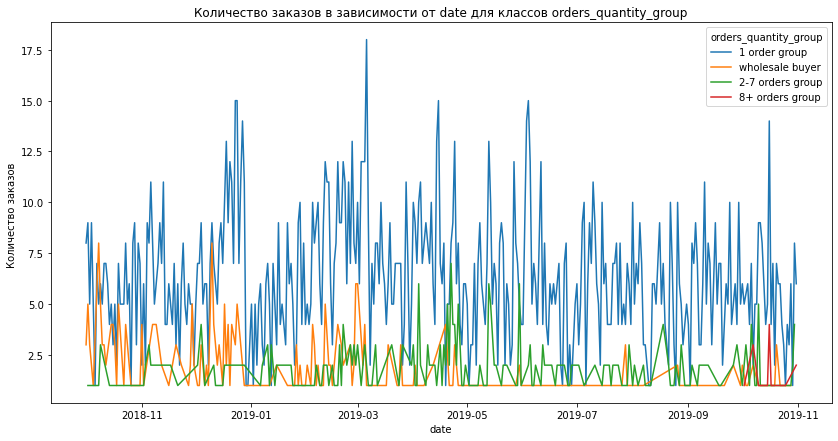

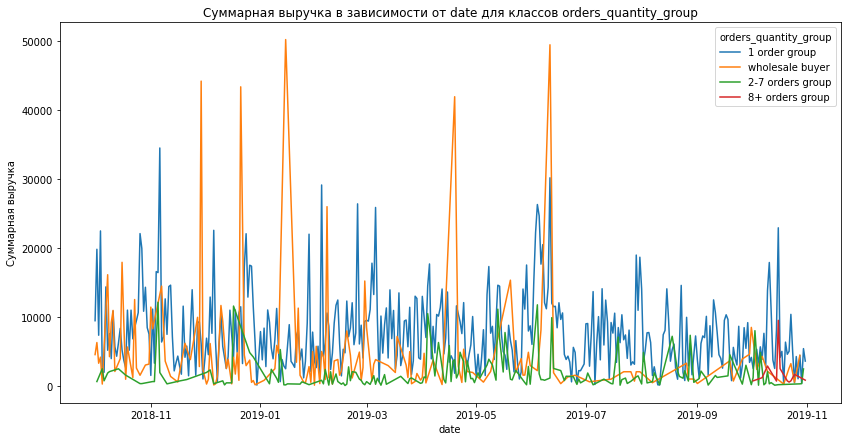

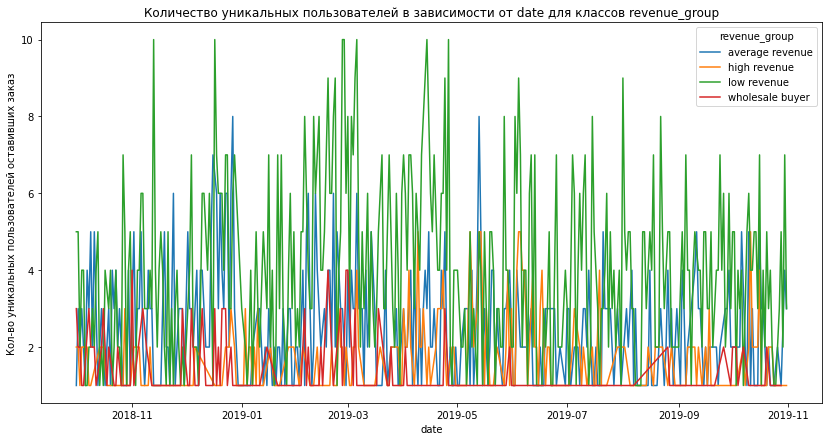

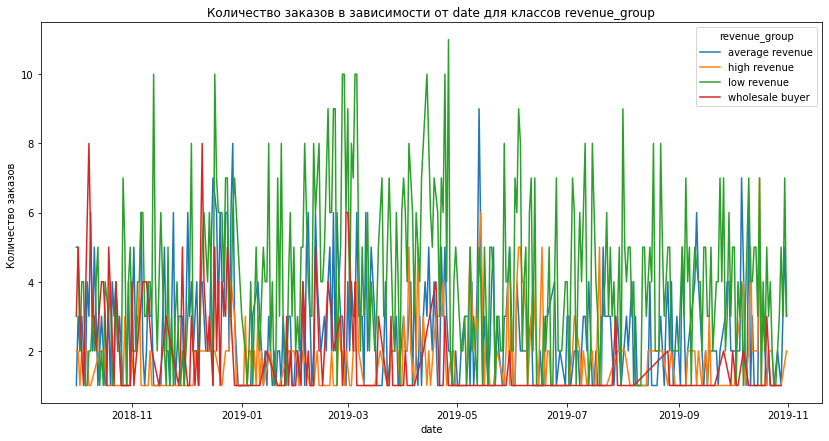

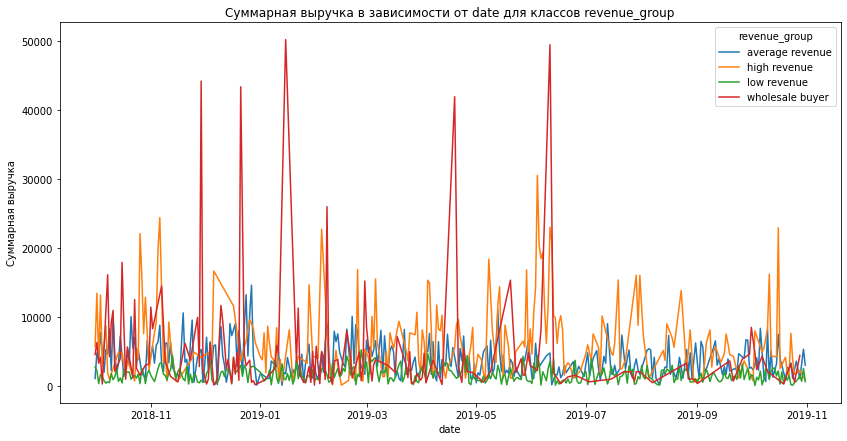

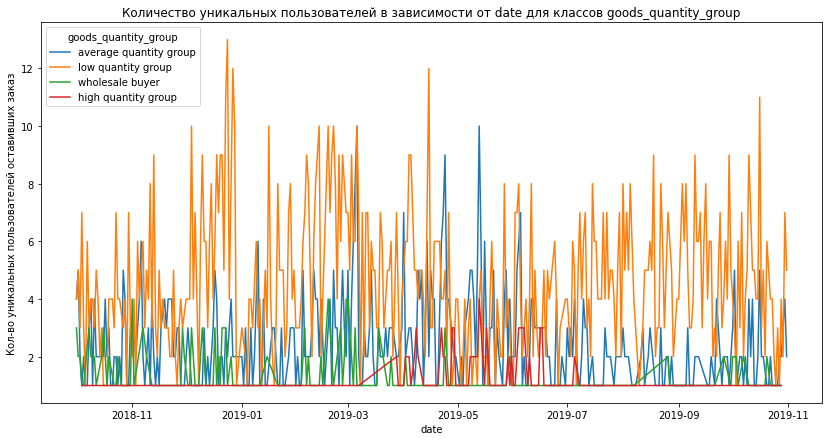

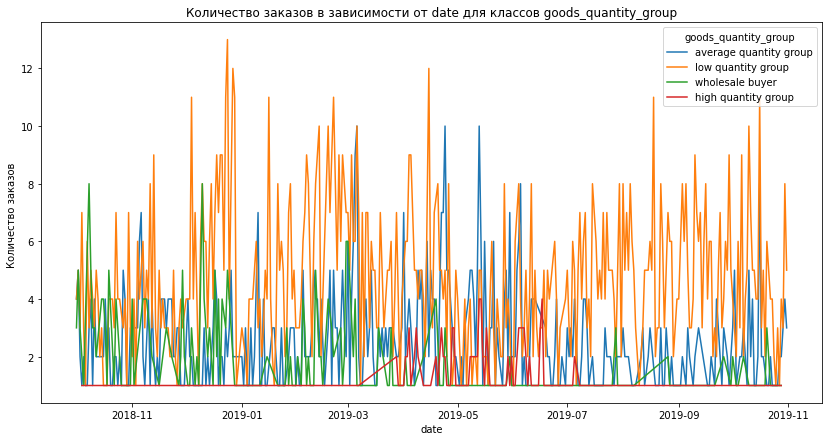

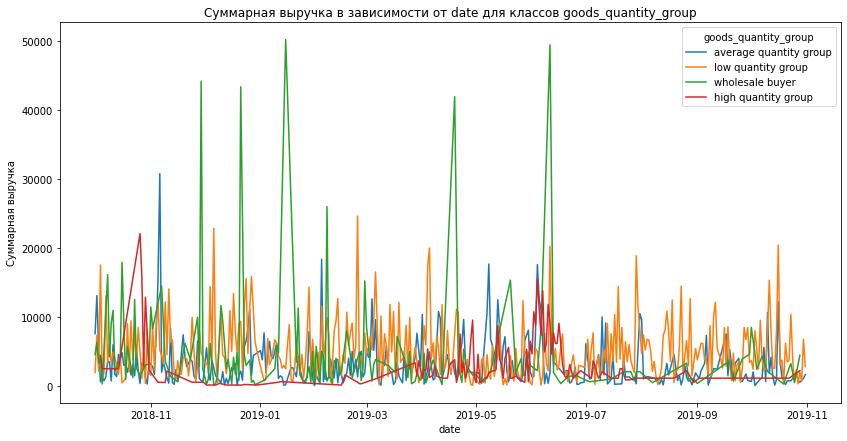

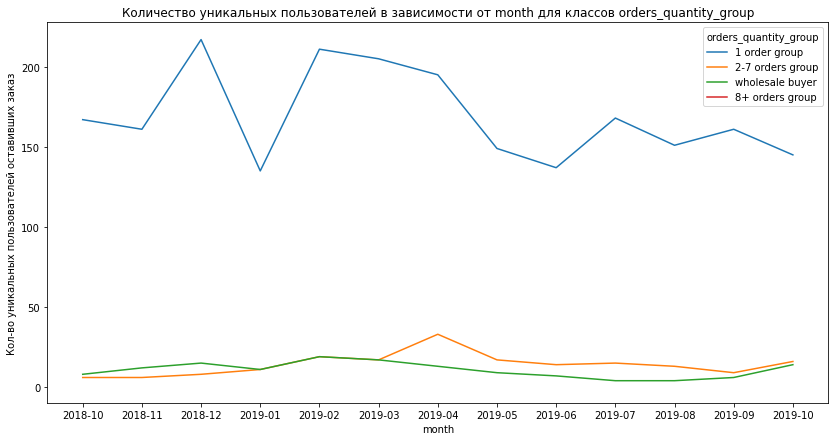

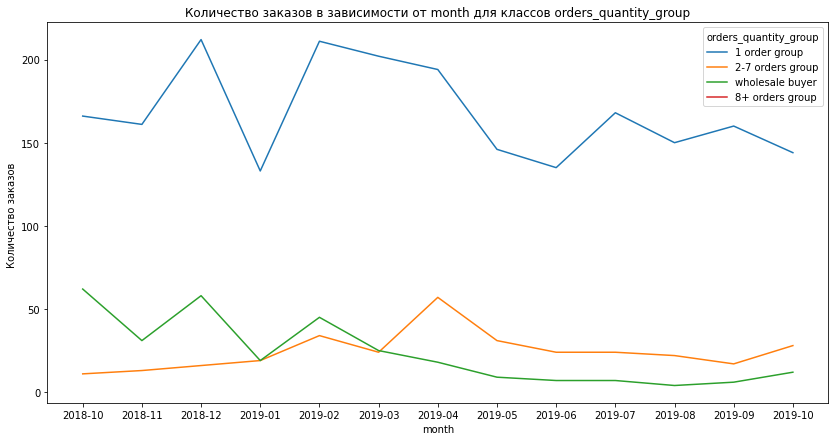

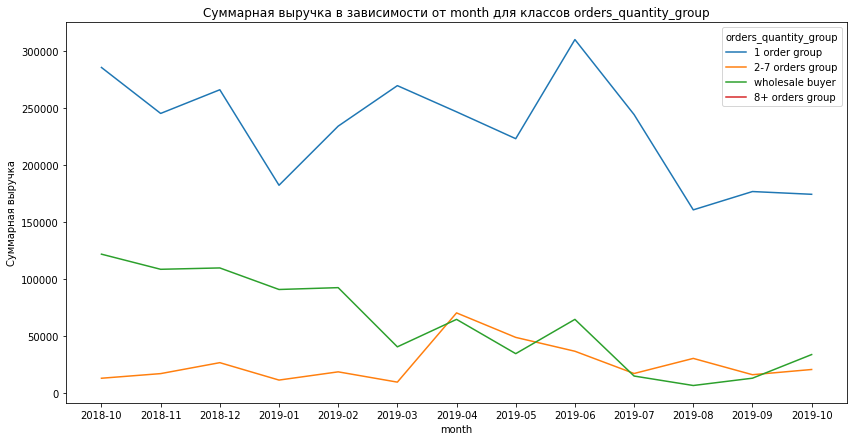

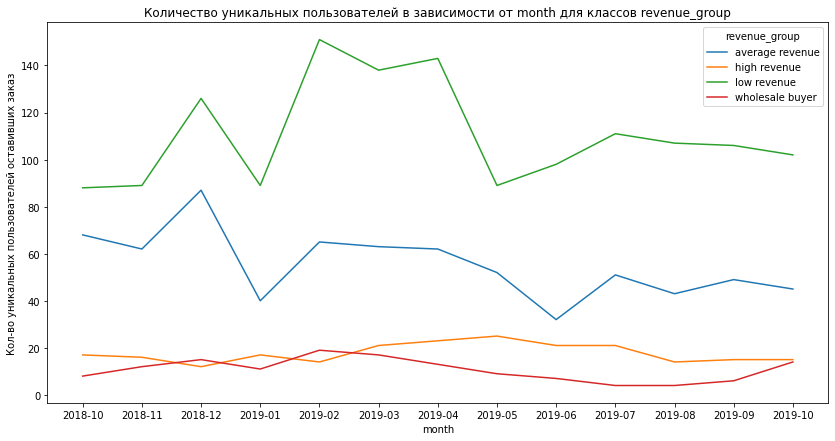

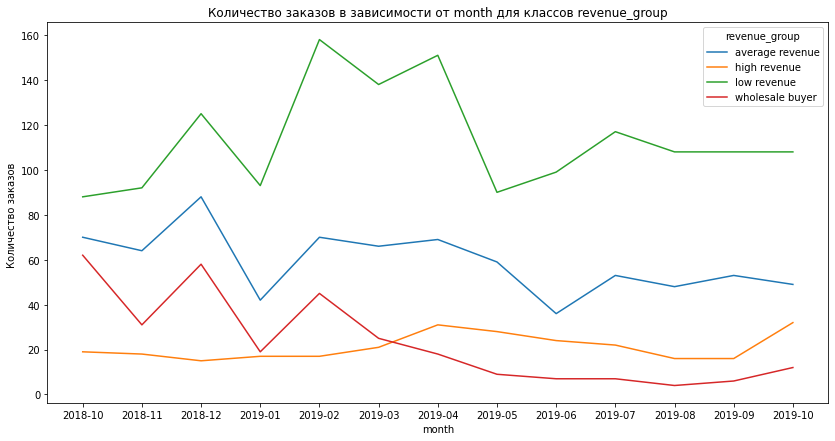

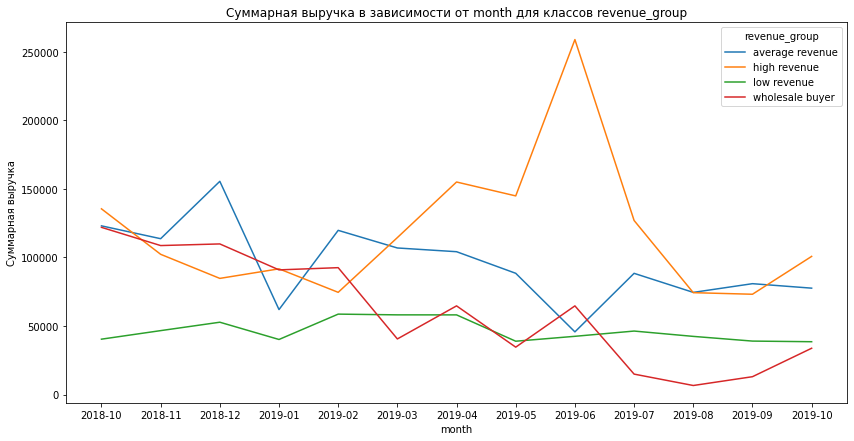

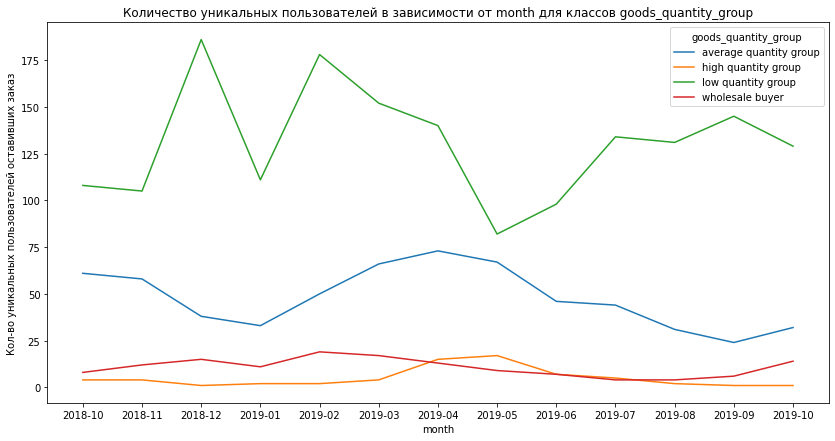

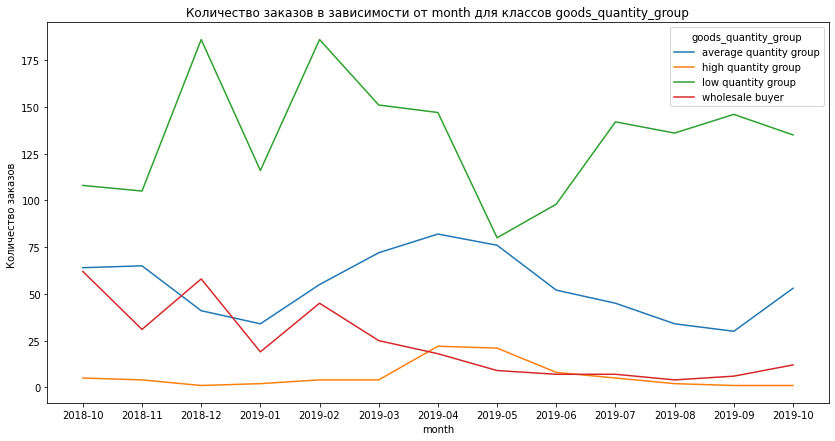

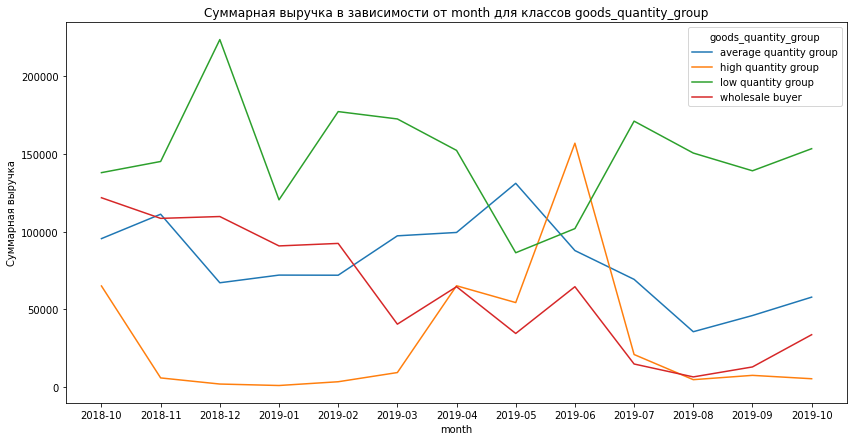

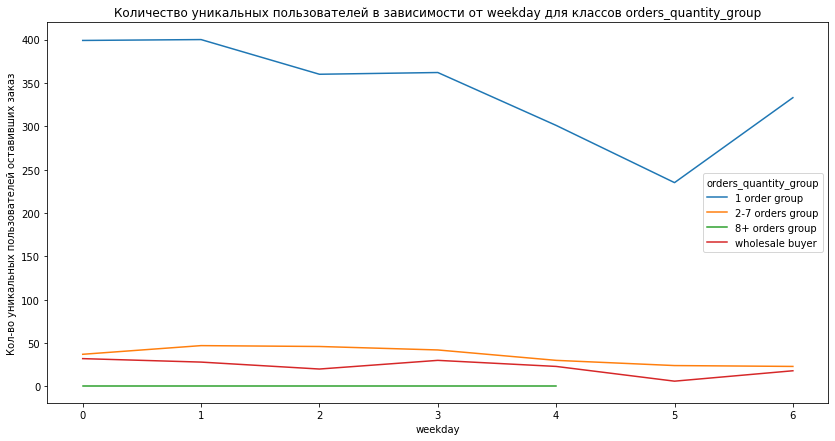

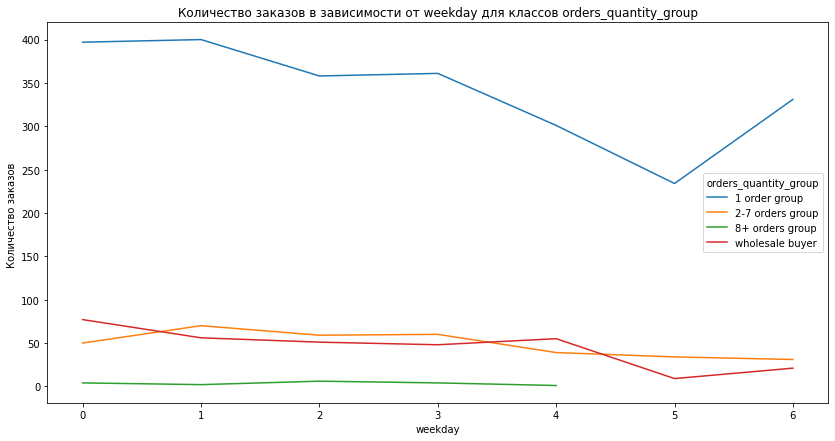

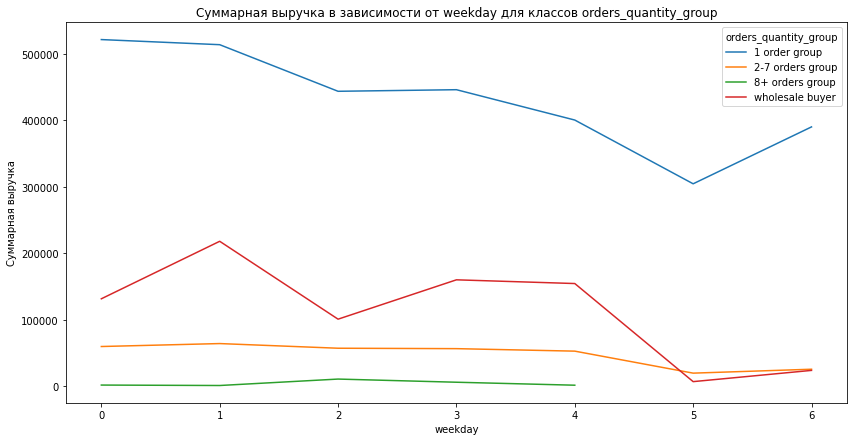

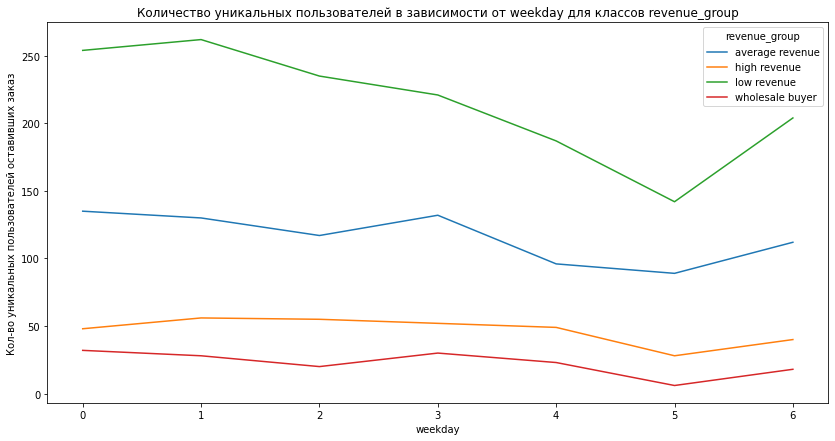

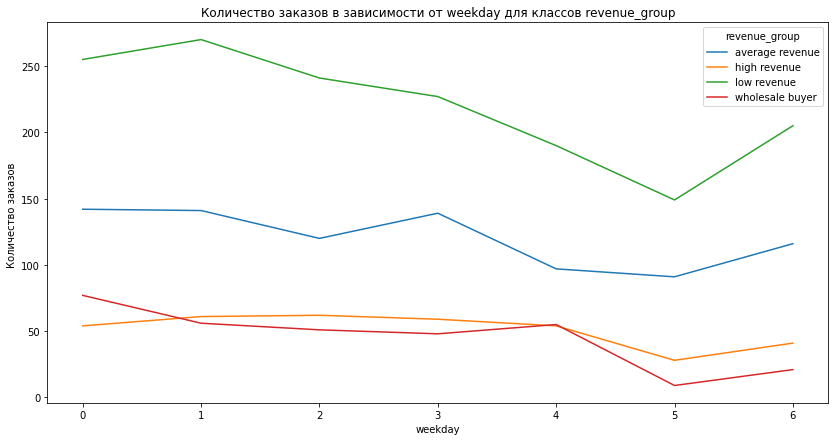

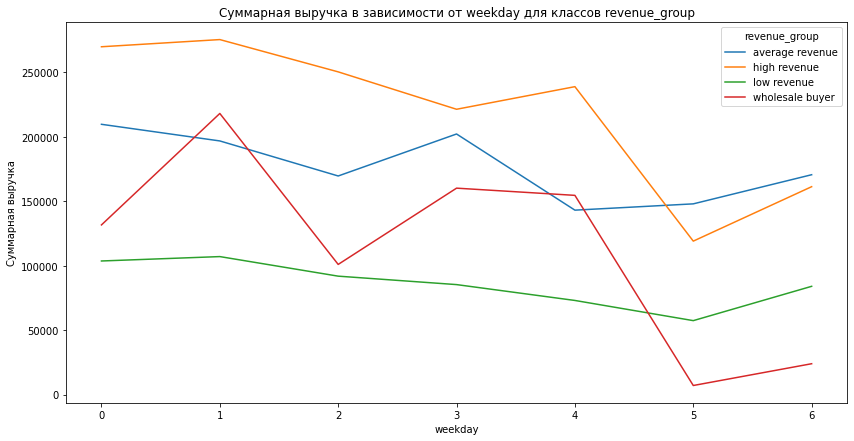

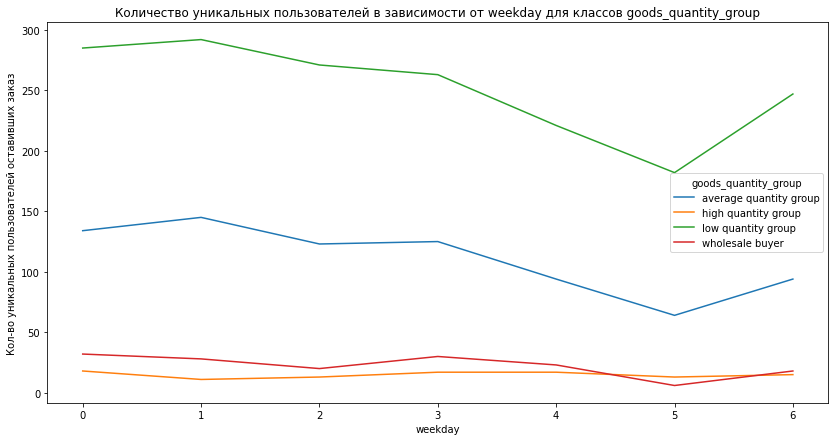

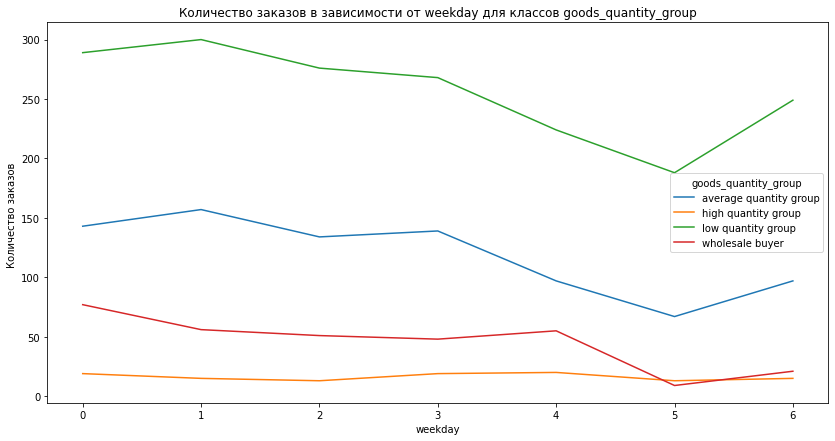

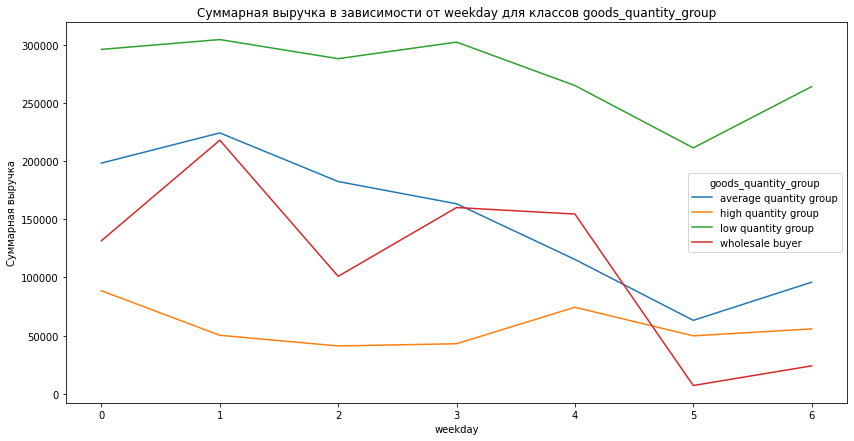

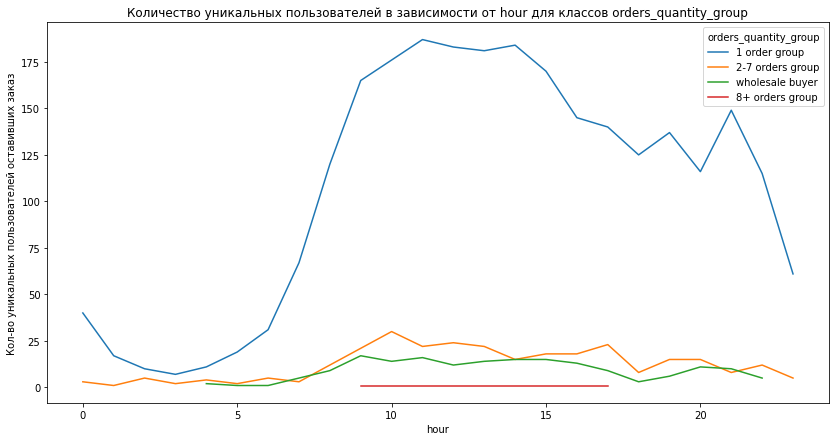

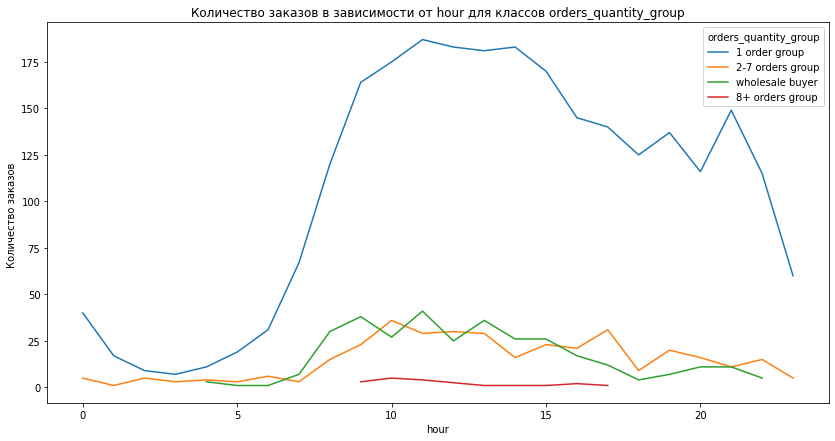

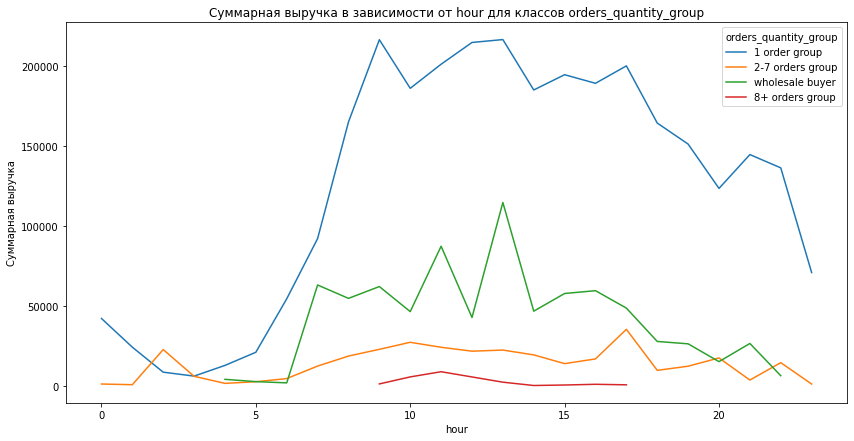

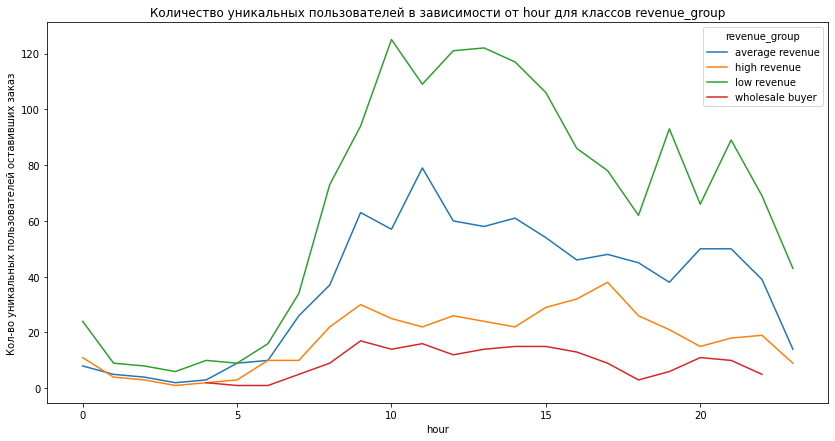

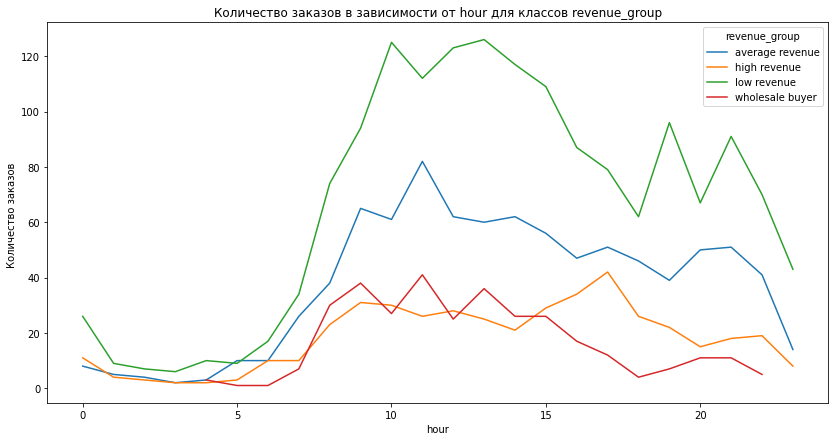

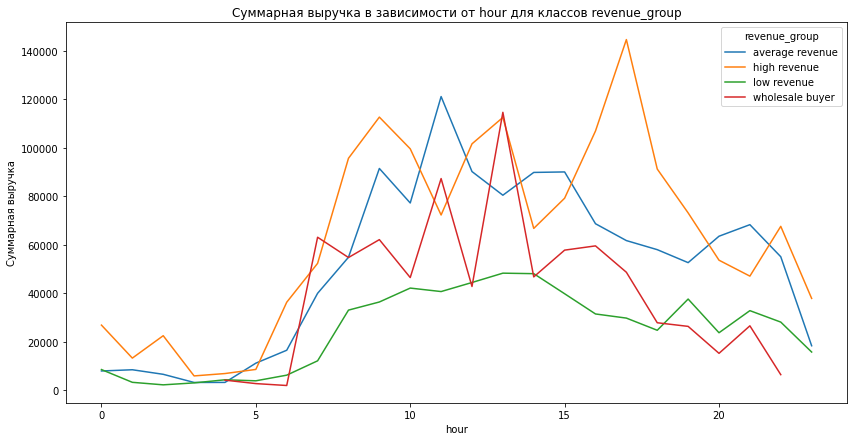

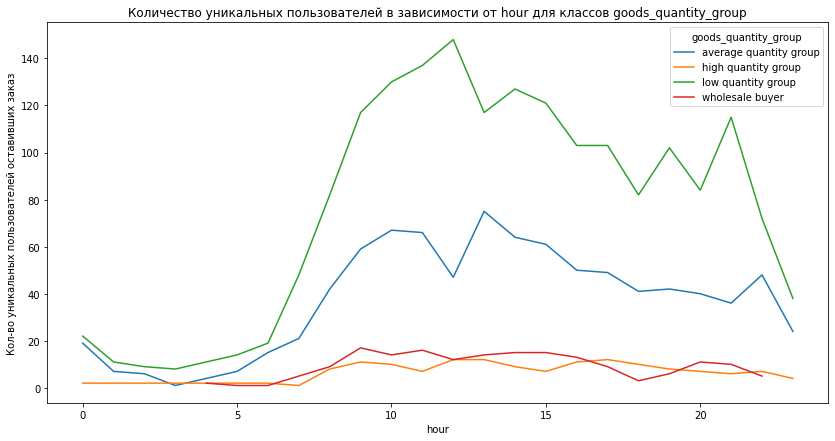

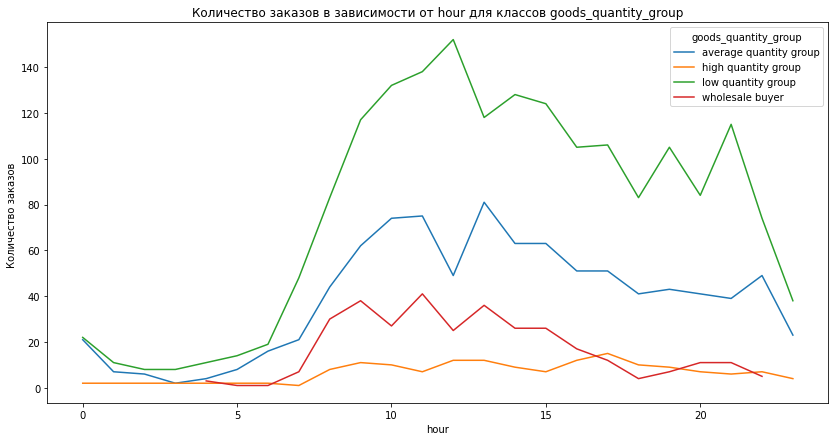

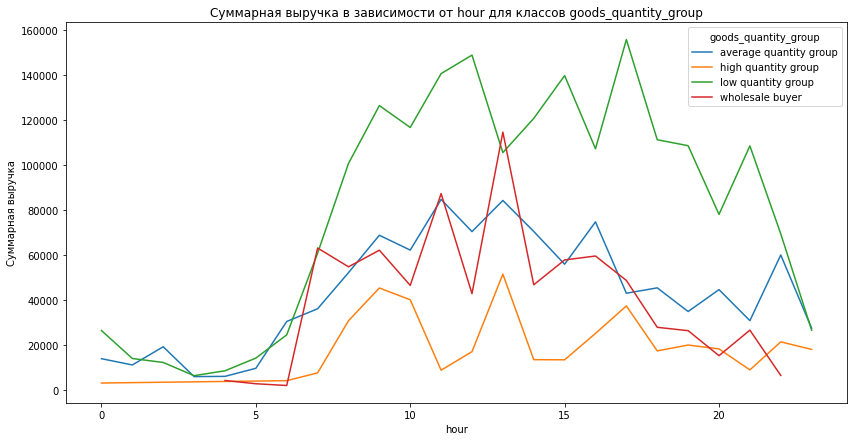

In [15]:
# Построение круговых диграмм

category_names = ['orders_quantity_group','revenue_group','goods_quantity_group']

for category in category_names:
    pie_data = data.pivot_table(index = [category], values = ['customer_id'], aggfunc = 'count').reset_index(drop=False)
    fig1, ax1 = plt.subplots()
    plt.title("Соотношение групп пользователей по параметру: {}".format(category))
    ax1.pie(pie_data['customer_id'], labels=pie_data[category],autopct='%1.1f%%')
    ax1.axis('equal')  
    plt.show()
    print()



index_group = ['date', 'month', 'weekday', 'hour']
category_names = ['orders_quantity_group','revenue_group','goods_quantity_group']

# Цикл для автоматизации процесса построения линейных графиков 
for index in index_group:

    for category in category_names:
        data_grouped = data.pivot_table(index = [index, category], values = ['customer_id','order_id'], aggfunc = 'nunique').reset_index(drop=False)
        plt.figure(figsize=(14, 7))
        plt.title("Количество уникальных пользователей в зависимости от {} для классов {}".format(index, category))
        plt.xlabel('{}'.format(index))
        plt.ylabel('Кол-во уникальных пользователей оставивших заказ')
        sns.lineplot(x = index, y = 'customer_id', hue = category, data = data_grouped )
        
        
        plt.figure(figsize=(14, 7))
        plt.title("Количество заказов в зависимости от {} для классов {}".format(index, category))
        plt.xlabel('{}'.format(index))
        plt.ylabel('Количество заказов ')
        sns.lineplot(x = index, y = 'order_id', hue = category, data = data_grouped )

        data_grouped = data.pivot_table(index = [index, category], values = ['revenue'], aggfunc = 'sum').reset_index(drop=False)
        plt.figure(figsize=(14, 7))
        plt.title("Суммарная выручка в зависимости от {} для классов {}".format(index, category))
        plt.xlabel('{}'.format(index))
        plt.ylabel('Суммарная выручка')
        sns.lineplot(x = index, y = 'revenue', hue = category, data = data_grouped )

Как видно из представленных визуализаций:

**Сравнение по количеству заказов:**

Пользователи, совершившие один заказ:
- Самая многочисленная группа (82,8%) в своей категории
- Стабильно чаще остальных совершали заказы в сравнении по дням
- Стабильно оставляли наибольшее количество заказов в сравнении по дням
- Приносят наибольшую выручку. 
- Наименее активны по субботам
- Наиболее активны в дневные часы

Пользователи, совершившие 2-7 заказов:
- На втором месте по численности (11,1%) в своей категории
- Имеют ровную активность в течение всего года с пиками в апреле 
- Активны в течение всей неделе с незначительным снижением в выходные дни

Пользователи, совершившие 8 и более заказоа (без учета предполагаемых оптовиков)
- Имеют наименьшую численность (0,3%) в своей категории
- Были активны только в октябре 2019
- С понедельника по пятницу с 9 до 16. *Возможно, это корпоративные клиенты*

**Сравнение по сумме покупок:**

Пользователи с низкой суммой покупок (до 999 у.е.)
- Вторые по численности (31,5%) в своей категории
- Оставляли наибольшее количество заказов, но приносили наименьшую выручку
- Ровная кривая активности с пиком в весенний сезон
- Активны днем и вечером
- К субботе активность снижается

Пользователи со средней суммой покупок (от 999 до 3375 у.е.)
- Занимают пости 30 % в своей категории 
- Вторые по активности после пользователей с низкой суммой покупок
- Вторые по выручке после пользователей с высокой стоимостью покупок
- Активны в декабре и весной 
- Активны в дневное и вечернее время

Пользователи с высокой суммой покупок (от 3375 у.е.)
- Занимают треть в своей категории
- Низкая активность, которая компенсируется самой высокой выручкой
- Активны в теплое время года 
- Самая высокая вырчука среди всех других групп в июне 
- Выручка падает к выходным

**Сравнение по количеству купленных товаров:**

Пользователи с низким общим количеством купленных товаров (менее ):
- Занимают 36,2% в своей категории
- Самая активная группа с пиками активности весной 
- Приносят наибольшую выручку
- Активны днем

Пользователи со средним общим количеством купленных товаров (от 4 до 24):
- Занимают 22,7% в своей категории
- Наименьшая активность в субботу

Пользователи с высоким общим количеством купленных товаров (от 4 до 24):
- Занимают 35,4% в своей категориикупленных товаров
- Низкая активность, но выручка конкурентоспособная при сравнении с группой со средним количеством купленных товаров

**Описание возможных оптовиков:**

- Занимают 5,8% от всех клиентов
- Малое количество пользователей, совершающих заказы
- Малое количество заказов
- Выручка в осенне-зимний период увеличивается. Возможно, из-за сезона скидок, в который оптовики набирают товары для последующей перепродажи в следующем году. При куда меньшем количестве пользователей в эти месяца данная категория генерирует сопоставимую выручку с категориями "Пользователи со средней суммой покупок (30%)"



### Выводы по разделу

В ходе разработки данного раздела исследования были получены следующие выводы и закономерности:

**Для всех пользователей до сегментации:**

- Зависимость от даты. Показатели количества новых пользователей, размещенных заказов и выручки имеют резкую волнообразную структуру с резкими взлетами и падениями. Возможно, это влияние зависимости показателей от дней недели. Например, в выходные люди могут совершать меньше заказов. Также, может наблюдаться сезонная зависимость показателей от времени года. Для аналитики сезонной зависимости и месячной зависимости необходимо иметь данные за период бне менее 2-3. В противном случае возможны отклонения прогнозов от факта.


- Зависимость от месяца. Наибольшее количество новых пользователей оформило заказы в октябре. Хороший показатель также имели декабрь (новогодние подарки) и период февраль-апрель (подготовка к дачному сезону). Количество размещенных заказов имеет аналогичные показатели. Наибольшую же выручку вновь показал октябрь. Хорошими в плане выручки также были декабрь и период февраля по июнь. В июле и августе наблюдается резкое снижение выручки.


- Зависимость от дня недели. Количество уникальных пользователей, разместивших заказ больше всего в первой половине недели и в воскресенье. Суббота обладает наименьшим показателем. Наибольшее количество заказов размещается с понедельника по четверг. В субботу наблюдается падение спроса. Наибольшая выручка добывается в понедельник-вторник. Наименьший показатель, опять же, в субботу.  Есть подозрение, что пользователи спешат сделать заказ в начале недели, чтобы непременно получить его до выходных и в субботу уже использовать полученный товар. Возможно, причина такого распределения кроется в длительном сроке доставки (заказ, сделанный в четверг не успеет доехать до субботы) и ограниченной зоне доставки, т.к. пользователи не могут заказать товар сразу к себе на дачу, а в понедельник-вторник он им не нужен, т.к. та же рассада потребует ухода до момента использования в выходной день.


- Зависимость от времени суток. Ожидаемо, самое активное и прибыльное время - дневное с 10 до 14 часов. К ночи активновсть спадает


После изучения сгруппированных значений были сделаны слудющие выводы:

**Количество заказов** 

Как видно из построенной гистограммы - подавляющее большинство пользователей сделали лишь один заказ. ТОП-10 активных пользователей замыкают пользователи, совершившие лишь 3 заказа. 99-ый персентиль равен 3, что свидетельствет о том, что 99% пользователей совершили 3 и менее заказов. При этом еще 5 пользователей совершили от 4 до 7 заказов. 3 пользователя совершили 17 и более заказов

**Выручка**

90% покупателей принесли выручку меньшую или равную 3375 у.е. лишь 7 пользователей совершили суммарные покупки на 50 000 у.е. или более


**Количество купленных единиц товаров** 

90 или более процентов покупателей купили суммарно 11 или меньше единиц товара. 95% покупателей остановились на отметке в 25 единиц товара.

По результатам анализа логично следующее распределение пользователей на сегменты:

**По количеству заказов**
- единоразовый клиент - 1 совершенный заказ
- постоянный клиент - 2-7 совершенных заказов
- оптовый покупатель - 8 и более совершенных заказов 

**По сумме заказов**
- клиент с маленькой суммой заказов - 0-999 у.е. 
- клиент со средней суммой заказов - 1000-3375 у.е. 
- клиент высокой суммой заказов- 3376 и выше у.е. 

**По количеству купленных единиц товаров**
- клиент с обычным количеством позиций - 0-3 позиций
- клиент с повышенным количеством позиций - 4-24 позиций
- клиент с большим количеством позиций - 25+ позиций

Были определены пользователей с подохрительной активностью, они были отделены в отделную категорий возможных оптовиков

В процессе анализа обнаружилось, что заказы на 900 и 224 позиций не принадлежит к оптовым закупкам, скорее он принадлежит настоящему садовому эксперементатору. Интересно то, что номер заказ одинаков для всех записей при том, что дата меняется. 

**Необходимо спросить у лица, которое передало данные, нормально ли это, т.к. возможно это технический сбой при сборе данных, который объединяет разные заказы пользователя в один. Это может быть вероятной причиной подавляющего количества пользователей, которые якобы совершили лишь 1 заказ.**

На данном моменте следовало бы приостановить анализ до момента прояснения, т.к. данное явление может сказаться на точности измерения показателей количества заказов, их распределения по времени, средней стоимости заказа, среднему количеству товаров в заказе. Список таких заказов, которые требуют проверки, был приведен.

Пользователям были присвоины 3 категории в зависимости от покупательского поведения (количество, сумма заказа, количество товаров в заказе). Каждой записи датасета на основе id пользователя были присвоены 3 классификатора, добавлены расчетные величины с указанием общего количества, выручки и суммы покупок для данного клиента. Предполагаемым оптовым покупателям было добавлено отдельное значение в каждом классификаторе.

**Сравнение по количеству заказов:**

Пользователи, совершившие один заказ:
- Самая многочисленная группа (82,8%) в своей категории
- Стабильно чаще остальных совершали заказы в сравнении по дням
- Стабильно оставляли наибольшее количество заказов в сравнении по дням
- Приносят наибольшую выручку. 
- Наименее активны по субботам
- Наиболее активны в дневные часы

Пользователи, совершившие 2-7 заказов:
- На втором месте по численности (11,1%) в своей категории
- Имеют ровную активность в течение всего года с пиками в апреле 
- Активны в течение всей неделе с незначительным снижением в выходные дни

Пользователи, совершившие 8 и более заказоа (без учета предполагаемых оптовиков)
- Имеют наименьшую численность (0,3%) в своей категории
- Были активны только в октябре 2019
- С понедельника по пятницу с 9 до 16. *Возможно, это корпоративные клиенты*

**Сравнение по сумме покупок:**

Пользователи с низкой суммой покупок (до 999 у.е.)
- Вторые по численности (31,5%) в своей категории
- Оставляли наибольшее количество заказов, но приносили наименьшую выручку
- Ровная кривая активности с пиком в весенний сезон
- Активны днем и вечером
- К субботе активность снижается

Пользователи со средней суммой покупок (от 999 до 3375 у.е.)
- Занимают пости 30 % в своей категории 
- Вторые по активности после пользователей с низкой суммой покупок
- Вторые по выручке после пользователей с высокой стоимостью покупок
- Активны в декабре и весной 
- Активны в дневное и вечернее время

Пользователи с высокой суммой покупок (от 3375 у.е.)
- Занимают треть в своей категории
- Низкая активность, которая компенсируется самой высокой выручкой
- Активны в теплое время года 
- Самая высокая вырчука среди всех других групп в июне 
- Выручка падает к выходным

**Сравнение по количеству купленных товаров:**

Пользователи с низким общим количеством купленных товаров (менее ):
- Занимают 36,2% в своей категории
- Самая активная группа с пиками активности весной 
- Приносят наибольшую выручку
- Активны днем

Пользователи со средним общим количеством купленных товаров (от 4 до 24):
- Занимают 22,7% в своей категории
- Наименьшая активность в субботу

Пользователи с высоким общим количеством купленных товаров (от 4 до 24):
- Занимают 35,4% в своей категориикупленных товаров
- Низкая активность, но выручка конкурентоспособная при сравнении с группой со средним количеством купленных товаров

**Описание возможных оптовиков:**

- Занимают 5,8% от всех клиентов
- Малое количество пользователей, совершающих заказы
- Малое количество заказов
- Выручка в осенне-зимний период увеличивается. Возможно, из-за сезона скидок, в который оптовики набирают товары для последующей перепродажи в следующем году. При куда меньшем количестве пользователей в эти месяца данная категория генерирует сопоставимую выручку с категориями "Пользователи со средней суммой покупок (30%)"


## Оглашение и проверка гипотез

В ходе разработки данного раздела будут приыедены и проверены с помощью p-value 3 гипотезы

### Гипотеза №1 - Средняя сумма покупок оптовых покупателей

**Нулевая гипотеза:** Средняя сумма покупок оптовых покупателей больше 15000 у.е
**Обратная гипотеза:** Средняя сумма покупок оптовых покупателей **НЕ** больше 15000 у.е

In [16]:
wholesale_revenue = data.query('revenue_group == "wholesale buyer"')['total_revenue']

comparable_value = 15000

alpha = .05 # уровень статистической значимости

results = st.ttest_1samp(
    wholesale_revenue, 
    comparable_value)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо больше предполагаемого значения
if (results.pvalue / 2 < alpha) and (wholesale_revenue.mean() > comparable_value):
    print("Не отвергаем нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 7.673194239219368e-41
Не отвергаем нулевую гипотезу


В соответствии с полученным решением нулевая гипотеза не может быть отвергнута. Средняя сумма покупок оптовых покупателей больше 15000 у.е

### Гипотеза №2 - Пользовательская активность в выходные

**Нулевая гипотеза:** Пользователи в среднем оформляют в субботу столько же заказов, как и в воскоресенье.
**Обратная гипотеза:** Пользователи в среднем оформляют в субботу и в воскресенье разное количество заказов.

In [17]:
sat_orders = data.groupby(['date','weekday'])['order_id'].nunique().reset_index().query('weekday == 5')['order_id']
sun_orders = data.groupby(['date','weekday'])['order_id'].nunique().reset_index().query('weekday == 6')['order_id']

alpha = 0.01 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(sat_orders, sun_orders ) # ваш код: проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0005852670482861729
Отвергаем нулевую гипотезу


В соответствии с полученным решением нулевая гипотеза может быть отвергнута. Пользователи в среднем оформляют в субботу и в воскоресенье разное количество заказов.

### Гипотеза №3 - Выручка, получаемая от оптовиков и низкомаржинальных клиентов

**Нулевая гипотеза:** В среднем, выручка, которую приносят оптовые покупатели, равна выручке, которую приносят низкомаржинальные клиенты (группа low_revenue)
**Обратная гипотеза:** В среднем, выручка, которую приносят оптовые покупатели, **НЕ** равна выручке, которую приносят низкомаржинальные клиенты (группа low_revenue)

In [18]:
low_revenue_group = data.query('revenue_group == "low revenue"')['total_revenue']
wholesale_revenue = data.query('revenue_group == "wholesale buyer"')['total_revenue']

alpha = 0.01 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(low_revenue_group, wholesale_revenue) # ваш код: проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3123489776e-314
Отвергаем нулевую гипотезу


В соответствии с полученным решением нулевая гипотеза может быть отвергнута. В среднем, выручка, которую приносят оптовые покупатели, не равна выручке, которую приносят низкомаржинальные клиенты (группа low_revenue)

## Выводы и рекомендации

### Общий вывод по работе

В представленном для анализа датасете имеется 6737 записей, имеющих по 6 колонок:

- `date` — дата заказа + час совершения заказа; необходимо скорректировать формат значений на datetime
- `customer_id` — идентификатор покупателя; 
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара

В ходе разработки данного раздела исследования были получены следующие выводы и закономерности:

**Для всех пользователей до сегментации:**

- Зависимость от даты. Показатели количества новых пользователей, размещенных заказов и выручки имеют резкую волнообразную структуру с резкими взлетами и падениями. Возможно, это влияние зависимости показателей от дней недели. Например, в выходные люди могут совершать меньше заказов. Также, может наблюдаться сезонная зависимость показателей от времени года. Для аналитики сезонной зависимости и месячной зависимости необходимо иметь данные за период бне менее 2-3. В противном случае возможны отклонения прогнозов от факта.


- Зависимость от месяца. Наибольшее количество новых пользователей оформило заказы в октябре. Хороший показатель также имели декабрь (новогодние подарки) и период февраль-апрель (подготовка к дачному сезону). Количество размещенных заказов имеет аналогичные показатели. Наибольшую же выручку вновь показал октябрь. Хорошими в плане выручки также были декабрь и период февраля по июнь. В июле и августе наблюдается резкое снижение выручки.


- Зависимость от дня недели. Количество уникальных пользователей, разместивших заказ больше всего в первой половине недели и в воскресенье. Суббота обладает наименьшим показателем. Наибольшее количество заказов размещается с понедельника по четверг. В субботу наблюдается падение спроса. Наибольшая выручка добывается в понедельник-вторник. Наименьший показатель, опять же, в субботу.  Есть подозрение, что пользователи спешат сделать заказ в начале недели, чтобы непременно получить его до выходных и в субботу уже использовать полученный товар. Возможно, причина такого распределения кроется в длительном сроке доставки (заказ, сделанный в четверг не успеет доехать до субботы) и ограниченной зоне доставки, т.к. пользователи не могут заказать товар сразу к себе на дачу, а в понедельник-вторник он им не нужен, т.к. та же рассада потребует ухода до момента использования в выходной день.


- Зависимость от времени суток. Ожидаемо, самое активное и прибыльное время - дневное с 10 до 14 часов. К ночи активновсть спадает


После изучения сгруппированных значений были сделаны слудющие выводы:

**Количество заказов** 

Как видно из построенной гистограммы - подавляющее большинство пользователей сделали лишь один заказ. ТОП-10 активных пользователей замыкают пользователи, совершившие лишь 3 заказа. 99-ый персентиль равен 3, что свидетельствет о том, что 99% пользователей совершили 3 и менее заказов. При этом еще 5 пользователей совершили от 4 до 7 заказов. 3 пользователя совершили 17 и более заказов

**Выручка**

90% покупателей принесли выручку меньшую или равную 3375 у.е. лишь 7 пользователей совершили суммарные покупки на 50 000 у.е. или более


**Количество купленных единиц товаров** 

90 или более процентов покупателей купили суммарно 11 или меньше единиц товара. 95% покупателей остановились на отметке в 25 единиц товара.

По результатам анализа логично следующее распределение пользователей на сегменты:

**По количеству заказов**
- единоразовый клиент - 1 совершенный заказ
- постоянный клиент - 2-7 совершенных заказов
- оптовый покупатель - 8 и более совершенных заказов 

**По сумме заказов**
- клиент с маленькой суммой заказов - 0-999 у.е. 
- клиент со средней суммой заказов - 1000-3375 у.е. 
- клиент высокой суммой заказов- 3376 и выше у.е. 

**По количеству купленных единиц товаров**
- клиент с обычным количеством позиций - 0-3 позиций
- клиент с повышенным количеством позиций - 4-24 позиций
- клиент с большим количеством позиций - 25+ позиций

Были определены пользователей с подохрительной активностью, они были отделены в отделную категорий возможных оптовиков

В процессе анализа обнаружилось, что заказы на 900 и 224 позиций не принадлежит к оптовым закупкам, скорее он принадлежит настоящему садовому эксперементатору. Интересно то, что номер заказ одинаков для всех записей при том, что дата меняется. 

**Необходимо спросить у лица, которое передало данные, нормально ли это, т.к. возможно это технический сбой при сборе данных, который объединяет разные заказы пользователя в один. Это может быть вероятной причиной подавляющего количества пользователей, которые якобы совершили лишь 1 заказ.**

На данном моменте следовало бы приостановить анализ до момента прояснения, т.к. данное явление может сказаться на точности измерения показателей количества заказов, их распределения по времени, средней стоимости заказа, среднему количеству товаров в заказе. Список таких заказов, которые требуют проверки, был приведен.

Пользователям были присвоины 3 категории в зависимости от покупательского поведения (количество, сумма заказа, количество товаров в заказе). Каждой записи датасета на основе id пользователя были присвоены 3 классификатора, добавлены расчетные величины с указанием общего количества, выручки и суммы покупок для данного клиента. Предполагаемым оптовым покупателям было добавлено отдельное значение в каждом классификаторе.

**Сравнение по количеству заказов:**

Пользователи, совершившие один заказ:
- Самая многочисленная группа (82,8%) в своей категории
- Стабильно чаще остальных совершали заказы в сравнении по дням
- Стабильно оставляли наибольшее количество заказов в сравнении по дням
- Приносят наибольшую выручку. 
- Наименее активны по субботам
- Наиболее активны в дневные часы

Пользователи, совершившие 2-7 заказов:
- На втором месте по численности (11,1%) в своей категории
- Имеют ровную активность в течение всего года с пиками в апреле 
- Активны в течение всей неделе с незначительным снижением в выходные дни

Пользователи, совершившие 8 и более заказоа (без учета предполагаемых оптовиков)
- Имеют наименьшую численность (0,3%) в своей категории
- Были активны только в октябре 2019
- С понедельника по пятницу с 9 до 16. *Возможно, это корпоративные клиенты*

**Сравнение по сумме покупок:**

Пользователи с низкой суммой покупок (до 999 у.е.)
- Вторые по численности (31,5%) в своей категории
- Оставляли наибольшее количество заказов, но приносили наименьшую выручку
- Ровная кривая активности с пиком в весенний сезон
- Активны днем и вечером
- К субботе активность снижается

Пользователи со средней суммой покупок (от 999 до 3375 у.е.)
- Занимают пости 30 % в своей категории 
- Вторые по активности после пользователей с низкой суммой покупок
- Вторые по выручке после пользователей с высокой стоимостью покупок
- Активны в декабре и весной 
- Активны в дневное и вечернее время

Пользователи с высокой суммой покупок (от 3375 у.е.)
- Занимают треть в своей категории
- Низкая активность, которая компенсируется самой высокой выручкой
- Активны в теплое время года 
- Самая высокая вырчука среди всех других групп в июне 
- Выручка падает к выходным

**Сравнение по количеству купленных товаров:**

Пользователи с низким общим количеством купленных товаров (менее ):
- Занимают 36,2% в своей категории
- Самая активная группа с пиками активности весной 
- Приносят наибольшую выручку
- Активны днем

Пользователи со средним общим количеством купленных товаров (от 4 до 24):
- Занимают 22,7% в своей категории
- Наименьшая активность в субботу

Пользователи с высоким общим количеством купленных товаров (от 4 до 24):
- Занимают 35,4% в своей категориикупленных товаров
- Низкая активность, но выручка конкурентоспособная при сравнении с группой со средним количеством купленных товаров

**Описание возможных оптовиков:**

- Занимают 5,8% от всех клиентов
- Малое количество пользователей, совершающих заказы
- Малое количество заказов
- Выручка в осенне-зимний период увеличивается. Возможно, из-за сезона скидок, в который оптовики набирают товары для последующей перепродажи в следующем году. При куда меньшем количестве пользователей в эти месяца данная категория генерирует сопоставимую выручку с категориями "Пользователи со средней суммой покупок (30%)"



Были проверены 3 гипотезы:

1. Средняя сумма покупок оптовых покупателей больше 15000 у.е - Подтверждена
2. Пользователи в среднем оформляют в субботу столько же заказов, как и в воскоресенье.  - Отвергнута
3. В среднем, выручка, которую приносят оптовые покупатели, равна выручке, которую приносят низкомаржинальные клиенты (группа low_revenue) - Отвергнута


### Рекомендации Клиенту

- Необходимо разобраться с причиной сбора информации о заказах, когда 1 заказу соответствуют разные даты. Данный вопрос имеет прямое влияние на статистику заказов, работу с пользователями и их удержанием. Возможно, так в системе обозначаются заказы по кредитной линии для конкретных партнеров


- В данный момент большинство пользователей (83%) делают всего 1 заказ. Необходимо проработать систему удержания пользователей. Возможно, предложить им какую-либо скидку на 2 заказ. Также, это может быть наоборот влиянием слишком большой скидки на первый заказ. Пользователю гораздо выгоднее создать новый аккаунт и получить привественную скидку, чем совершать покупку со старого аккаунта. Также возможно на основе совершенных покупок, у которых есть расход (например, мыло, масло для садовой техники и т.д.), предложить пользователю пополнить свои запасы.


- В выходные пользовательская активность падает. Возможно, стоит напомнить о себе нераздражающей рассылкой с подборкой товаров на основе предпочтений пользователя. Также, возможно, что причина падения спроса кроется в работе службы доставки. Основная часть товаров магазина связана с дачей. Пользователи ездят туда по выходным и формируют свои заказы так, чтобы получить их к выходным. Возможно, создание службы доставки выходного дня за город поможет увеличить активность в выходные.


- Большим спросом пользуется рассада, которую берут перед летним сезоном. После периода, когда спрос на рассаду падает, продажи падают. Возможно, стоит расширить ассортимент товаров, которые понадобятся пользователям сразу после посадки


- Большую долю выручки составляют оптовые покупатели. Стоит связаться с ними напрямую и обговорить возможность сотрудничества на оптовых условиях.


- Часть клиентов посещает сайт только в рабочее время. Похоже на корпоративных клиентов. Стоит связаться с ними напрямую и обговорить возможность сотрудничества на оптовых условиях


- Пользователи с низкой стоимостью заказов делают их больше остальных. Необходимо замотивировать их покупать больше, например, введя бесплатную доставку от определенной суммы или предложив приятный бонус при наборе на определенную сумму.


# Спасибо за внимание!